<a href="https://colab.research.google.com/github/dhirajpatil19/fashion_mnist_GAN/blob/master/f_mnist_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
x_train = x_train/127.5-1

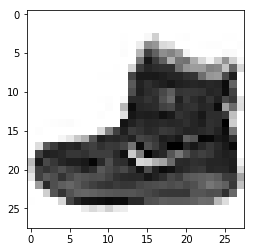

In [4]:
plt.imshow(x_train[0], cmap='Greys')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [7]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)         

In [8]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



0 [D loss: 0.827154, acc.: 59.38%] [G loss: 0.756608]


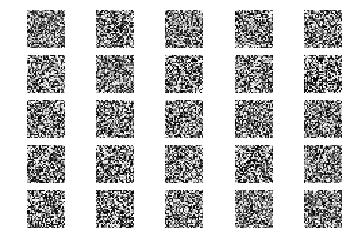

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.514871, acc.: 71.88%] [G loss: 0.777018]
2 [D loss: 0.322919, acc.: 89.06%] [G loss: 0.867249]
3 [D loss: 0.296683, acc.: 95.31%] [G loss: 0.944859]
4 [D loss: 0.284150, acc.: 90.62%] [G loss: 1.117182]
5 [D loss: 0.227099, acc.: 96.88%] [G loss: 1.234267]
6 [D loss: 0.196772, acc.: 100.00%] [G loss: 1.329596]
7 [D loss: 0.211054, acc.: 96.88%] [G loss: 1.408503]
8 [D loss: 0.197575, acc.: 96.88%] [G loss: 1.511121]
9 [D loss: 0.140364, acc.: 100.00%] [G loss: 1.588787]
10 [D loss: 0.129551, acc.: 100.00%] [G loss: 1.814649]
11 [D loss: 0.147940, acc.: 98.44%] [G loss: 1.855930]
12 [D loss: 0.133006, acc.: 100.00%] [G loss: 1.856188]
13 [D loss: 0.104347, acc.: 100.00%] [G loss: 1.984659]
14 [D loss: 0.082895, acc.: 100.00%] [G loss: 2.041366]
15 [D loss: 0.104084, acc.: 100.00%] [G loss: 2.116010]
16 [D loss: 0.089098, acc.: 100.00%] [G loss: 2.242680]
17 [D loss: 0.094380, acc.: 100.00%] [G loss: 2.322738]
18 [D loss: 0.070010, acc.: 100.00%] [G loss: 2.384185]
19 [D los

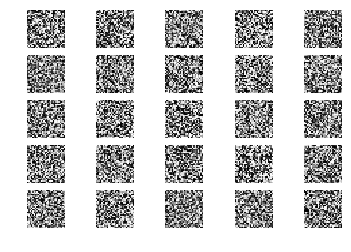

51 [D loss: 0.024807, acc.: 100.00%] [G loss: 3.495380]
52 [D loss: 0.021977, acc.: 100.00%] [G loss: 3.508600]
53 [D loss: 0.023613, acc.: 100.00%] [G loss: 3.557988]
54 [D loss: 0.021909, acc.: 100.00%] [G loss: 3.604446]
55 [D loss: 0.018258, acc.: 100.00%] [G loss: 3.510362]
56 [D loss: 0.024939, acc.: 100.00%] [G loss: 3.757014]
57 [D loss: 0.024802, acc.: 100.00%] [G loss: 3.581090]
58 [D loss: 0.022058, acc.: 100.00%] [G loss: 3.670373]
59 [D loss: 0.019270, acc.: 100.00%] [G loss: 3.870475]
60 [D loss: 0.015881, acc.: 100.00%] [G loss: 3.769933]
61 [D loss: 0.019512, acc.: 100.00%] [G loss: 3.862658]
62 [D loss: 0.023347, acc.: 100.00%] [G loss: 4.022568]
63 [D loss: 0.030622, acc.: 100.00%] [G loss: 3.916120]
64 [D loss: 0.039016, acc.: 98.44%] [G loss: 3.950712]
65 [D loss: 0.015409, acc.: 100.00%] [G loss: 3.910700]
66 [D loss: 0.018618, acc.: 100.00%] [G loss: 3.953533]
67 [D loss: 0.014301, acc.: 100.00%] [G loss: 3.886609]
68 [D loss: 0.022063, acc.: 100.00%] [G loss: 3.9

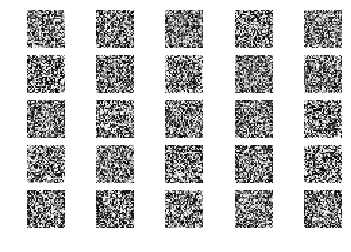

101 [D loss: 0.008664, acc.: 100.00%] [G loss: 4.508525]
102 [D loss: 0.039171, acc.: 98.44%] [G loss: 4.473990]
103 [D loss: 0.034626, acc.: 98.44%] [G loss: 4.475118]
104 [D loss: 0.014456, acc.: 100.00%] [G loss: 4.375135]
105 [D loss: 0.014894, acc.: 100.00%] [G loss: 4.587205]
106 [D loss: 0.021438, acc.: 100.00%] [G loss: 4.410700]
107 [D loss: 0.019837, acc.: 100.00%] [G loss: 4.630986]
108 [D loss: 0.011346, acc.: 100.00%] [G loss: 4.529712]
109 [D loss: 0.017468, acc.: 100.00%] [G loss: 4.636321]
110 [D loss: 0.019109, acc.: 100.00%] [G loss: 4.724095]
111 [D loss: 0.018166, acc.: 100.00%] [G loss: 4.843345]
112 [D loss: 0.011839, acc.: 100.00%] [G loss: 4.696394]
113 [D loss: 0.014748, acc.: 100.00%] [G loss: 4.619352]
114 [D loss: 0.025249, acc.: 100.00%] [G loss: 4.697775]
115 [D loss: 0.018237, acc.: 100.00%] [G loss: 4.617921]
116 [D loss: 0.021826, acc.: 100.00%] [G loss: 4.601349]
117 [D loss: 0.051805, acc.: 98.44%] [G loss: 4.567948]
118 [D loss: 0.017419, acc.: 100.0

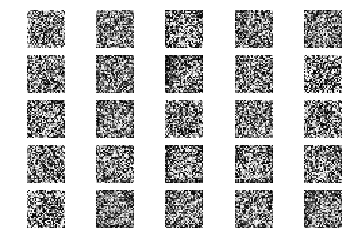

151 [D loss: 0.030727, acc.: 100.00%] [G loss: 4.533110]
152 [D loss: 0.026104, acc.: 100.00%] [G loss: 4.847733]
153 [D loss: 0.025084, acc.: 100.00%] [G loss: 5.119649]
154 [D loss: 0.039039, acc.: 100.00%] [G loss: 4.744701]
155 [D loss: 0.024540, acc.: 100.00%] [G loss: 4.730715]
156 [D loss: 0.020083, acc.: 100.00%] [G loss: 4.796113]
157 [D loss: 0.037063, acc.: 100.00%] [G loss: 4.934366]
158 [D loss: 0.108918, acc.: 98.44%] [G loss: 4.757463]
159 [D loss: 0.061167, acc.: 98.44%] [G loss: 4.614328]
160 [D loss: 0.046840, acc.: 100.00%] [G loss: 4.302647]
161 [D loss: 0.046446, acc.: 98.44%] [G loss: 4.826020]
162 [D loss: 0.033746, acc.: 100.00%] [G loss: 4.943749]
163 [D loss: 0.019237, acc.: 100.00%] [G loss: 5.207510]
164 [D loss: 0.018178, acc.: 100.00%] [G loss: 4.847705]
165 [D loss: 0.029702, acc.: 98.44%] [G loss: 4.318654]
166 [D loss: 0.154928, acc.: 92.19%] [G loss: 4.825930]
167 [D loss: 0.110642, acc.: 96.88%] [G loss: 4.349956]
168 [D loss: 0.071761, acc.: 95.31%] 

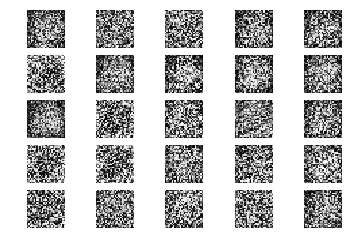

201 [D loss: 0.035180, acc.: 100.00%] [G loss: 4.862403]
202 [D loss: 0.102898, acc.: 96.88%] [G loss: 4.147046]
203 [D loss: 0.096565, acc.: 96.88%] [G loss: 4.506726]
204 [D loss: 0.173655, acc.: 92.19%] [G loss: 3.698693]
205 [D loss: 0.275762, acc.: 82.81%] [G loss: 3.956543]
206 [D loss: 0.058891, acc.: 100.00%] [G loss: 4.437192]
207 [D loss: 0.114962, acc.: 96.88%] [G loss: 4.745103]
208 [D loss: 0.051064, acc.: 100.00%] [G loss: 4.802587]
209 [D loss: 0.244307, acc.: 90.62%] [G loss: 4.589613]
210 [D loss: 0.094784, acc.: 98.44%] [G loss: 4.695985]
211 [D loss: 0.097360, acc.: 100.00%] [G loss: 4.441678]
212 [D loss: 0.073963, acc.: 98.44%] [G loss: 4.383338]
213 [D loss: 0.083666, acc.: 96.88%] [G loss: 3.908706]
214 [D loss: 0.212330, acc.: 87.50%] [G loss: 4.340971]
215 [D loss: 0.130921, acc.: 95.31%] [G loss: 4.948569]
216 [D loss: 0.095832, acc.: 96.88%] [G loss: 4.534206]
217 [D loss: 0.118000, acc.: 95.31%] [G loss: 4.352645]
218 [D loss: 0.055047, acc.: 98.44%] [G loss

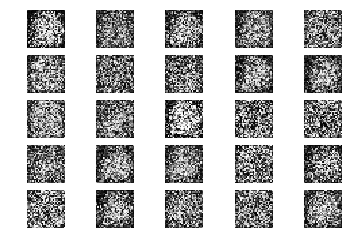

251 [D loss: 0.313603, acc.: 85.94%] [G loss: 3.740642]
252 [D loss: 0.159816, acc.: 93.75%] [G loss: 4.157541]
253 [D loss: 0.163366, acc.: 93.75%] [G loss: 4.023657]
254 [D loss: 0.300655, acc.: 84.38%] [G loss: 3.777176]
255 [D loss: 0.081061, acc.: 95.31%] [G loss: 4.989204]
256 [D loss: 0.166976, acc.: 96.88%] [G loss: 4.149420]
257 [D loss: 0.089292, acc.: 96.88%] [G loss: 4.315657]
258 [D loss: 0.188412, acc.: 92.19%] [G loss: 4.021165]
259 [D loss: 0.290856, acc.: 85.94%] [G loss: 3.731970]
260 [D loss: 0.053116, acc.: 100.00%] [G loss: 4.272862]
261 [D loss: 0.197719, acc.: 92.19%] [G loss: 3.189674]
262 [D loss: 0.234530, acc.: 92.19%] [G loss: 4.605561]
263 [D loss: 0.701603, acc.: 78.12%] [G loss: 2.836326]
264 [D loss: 0.171148, acc.: 95.31%] [G loss: 3.629320]
265 [D loss: 0.045042, acc.: 100.00%] [G loss: 4.226034]
266 [D loss: 0.240848, acc.: 89.06%] [G loss: 4.193151]
267 [D loss: 0.197266, acc.: 95.31%] [G loss: 4.142310]
268 [D loss: 0.206422, acc.: 95.31%] [G loss: 

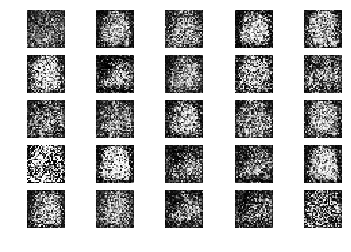

301 [D loss: 0.421996, acc.: 81.25%] [G loss: 2.917326]
302 [D loss: 0.146069, acc.: 95.31%] [G loss: 3.026848]
303 [D loss: 0.271722, acc.: 87.50%] [G loss: 3.299427]
304 [D loss: 0.384656, acc.: 84.38%] [G loss: 2.810790]
305 [D loss: 0.244524, acc.: 87.50%] [G loss: 3.547124]
306 [D loss: 0.400304, acc.: 84.38%] [G loss: 3.031577]
307 [D loss: 0.327544, acc.: 89.06%] [G loss: 3.502403]
308 [D loss: 0.423000, acc.: 81.25%] [G loss: 2.572805]
309 [D loss: 0.236108, acc.: 92.19%] [G loss: 3.331763]
310 [D loss: 0.575851, acc.: 87.50%] [G loss: 3.401882]
311 [D loss: 0.388633, acc.: 81.25%] [G loss: 3.091727]
312 [D loss: 0.317669, acc.: 84.38%] [G loss: 3.374489]
313 [D loss: 1.034823, acc.: 60.94%] [G loss: 2.194772]
314 [D loss: 0.546453, acc.: 76.56%] [G loss: 2.713041]
315 [D loss: 0.101923, acc.: 98.44%] [G loss: 4.180927]
316 [D loss: 0.440718, acc.: 84.38%] [G loss: 2.726797]
317 [D loss: 0.371855, acc.: 82.81%] [G loss: 3.270871]
318 [D loss: 0.348177, acc.: 92.19%] [G loss: 3.

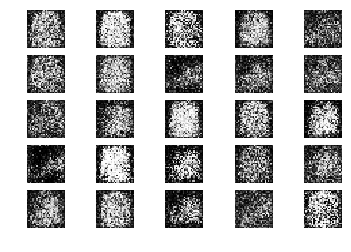

351 [D loss: 0.530535, acc.: 73.44%] [G loss: 1.930563]
352 [D loss: 0.428806, acc.: 81.25%] [G loss: 1.780807]
353 [D loss: 0.442693, acc.: 78.12%] [G loss: 2.526655]
354 [D loss: 0.665256, acc.: 64.06%] [G loss: 1.729822]
355 [D loss: 0.523407, acc.: 71.88%] [G loss: 1.960113]
356 [D loss: 0.328101, acc.: 93.75%] [G loss: 2.760519]
357 [D loss: 0.366713, acc.: 82.81%] [G loss: 2.297840]
358 [D loss: 0.566545, acc.: 70.31%] [G loss: 2.290198]
359 [D loss: 0.241715, acc.: 92.19%] [G loss: 2.616414]
360 [D loss: 0.406838, acc.: 84.38%] [G loss: 1.864001]
361 [D loss: 0.694677, acc.: 56.25%] [G loss: 1.742313]
362 [D loss: 0.402728, acc.: 84.38%] [G loss: 2.414915]
363 [D loss: 0.441300, acc.: 79.69%] [G loss: 2.431081]
364 [D loss: 0.387684, acc.: 82.81%] [G loss: 2.302686]
365 [D loss: 0.640481, acc.: 78.12%] [G loss: 2.003526]
366 [D loss: 0.354301, acc.: 82.81%] [G loss: 2.737383]
367 [D loss: 0.327392, acc.: 89.06%] [G loss: 2.198162]
368 [D loss: 0.688615, acc.: 62.50%] [G loss: 1.

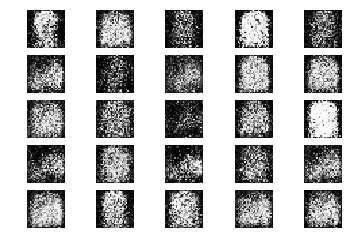

401 [D loss: 0.689533, acc.: 64.06%] [G loss: 1.393413]
402 [D loss: 0.488207, acc.: 81.25%] [G loss: 1.601782]
403 [D loss: 0.700023, acc.: 60.94%] [G loss: 1.613575]
404 [D loss: 0.701451, acc.: 65.62%] [G loss: 1.437761]
405 [D loss: 0.586471, acc.: 62.50%] [G loss: 1.517976]
406 [D loss: 0.627410, acc.: 64.06%] [G loss: 1.604316]
407 [D loss: 0.606712, acc.: 75.00%] [G loss: 1.512162]
408 [D loss: 0.835133, acc.: 51.56%] [G loss: 1.260734]
409 [D loss: 0.630940, acc.: 67.19%] [G loss: 1.258239]
410 [D loss: 0.683815, acc.: 62.50%] [G loss: 1.416007]
411 [D loss: 0.763555, acc.: 57.81%] [G loss: 1.290719]
412 [D loss: 0.492729, acc.: 79.69%] [G loss: 1.643911]
413 [D loss: 0.682846, acc.: 64.06%] [G loss: 1.307909]
414 [D loss: 0.712907, acc.: 57.81%] [G loss: 1.360780]
415 [D loss: 0.768757, acc.: 59.38%] [G loss: 1.068567]
416 [D loss: 0.630177, acc.: 65.62%] [G loss: 1.162140]
417 [D loss: 0.602190, acc.: 71.88%] [G loss: 1.415990]
418 [D loss: 0.677552, acc.: 65.62%] [G loss: 1.

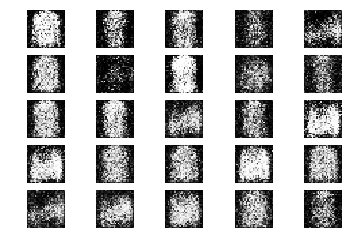

451 [D loss: 0.654195, acc.: 68.75%] [G loss: 1.209345]
452 [D loss: 0.680255, acc.: 67.19%] [G loss: 1.220493]
453 [D loss: 0.523102, acc.: 82.81%] [G loss: 1.299441]
454 [D loss: 0.560500, acc.: 70.31%] [G loss: 1.138280]
455 [D loss: 0.573286, acc.: 73.44%] [G loss: 1.358386]
456 [D loss: 0.727358, acc.: 65.62%] [G loss: 1.157925]
457 [D loss: 0.586122, acc.: 68.75%] [G loss: 1.089066]
458 [D loss: 0.583780, acc.: 70.31%] [G loss: 1.005504]
459 [D loss: 0.677568, acc.: 59.38%] [G loss: 1.176555]
460 [D loss: 0.658936, acc.: 65.62%] [G loss: 1.201515]
461 [D loss: 0.755596, acc.: 51.56%] [G loss: 1.069494]
462 [D loss: 0.527791, acc.: 75.00%] [G loss: 1.232415]
463 [D loss: 0.664355, acc.: 68.75%] [G loss: 1.144947]
464 [D loss: 0.615276, acc.: 73.44%] [G loss: 1.141246]
465 [D loss: 0.617438, acc.: 70.31%] [G loss: 1.137258]
466 [D loss: 0.611013, acc.: 67.19%] [G loss: 1.028398]
467 [D loss: 0.590428, acc.: 68.75%] [G loss: 1.143595]
468 [D loss: 0.575507, acc.: 70.31%] [G loss: 1.

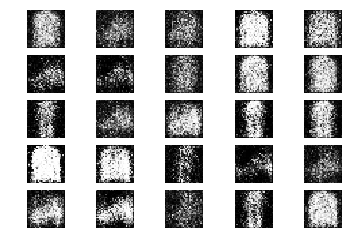

501 [D loss: 0.610633, acc.: 75.00%] [G loss: 1.025702]
502 [D loss: 0.625623, acc.: 62.50%] [G loss: 1.007833]
503 [D loss: 0.533221, acc.: 76.56%] [G loss: 1.032825]
504 [D loss: 0.568306, acc.: 67.19%] [G loss: 1.054169]
505 [D loss: 0.581421, acc.: 70.31%] [G loss: 1.043027]
506 [D loss: 0.601077, acc.: 81.25%] [G loss: 1.026754]
507 [D loss: 0.592520, acc.: 73.44%] [G loss: 1.109840]
508 [D loss: 0.562789, acc.: 76.56%] [G loss: 1.096934]
509 [D loss: 0.595438, acc.: 67.19%] [G loss: 1.143818]
510 [D loss: 0.540141, acc.: 75.00%] [G loss: 1.246227]
511 [D loss: 0.626227, acc.: 71.88%] [G loss: 1.124858]
512 [D loss: 0.726899, acc.: 60.94%] [G loss: 1.025812]
513 [D loss: 0.570376, acc.: 79.69%] [G loss: 1.055660]
514 [D loss: 0.672418, acc.: 68.75%] [G loss: 1.141432]
515 [D loss: 0.566624, acc.: 75.00%] [G loss: 1.230931]
516 [D loss: 0.738307, acc.: 60.94%] [G loss: 1.047569]
517 [D loss: 0.512354, acc.: 78.12%] [G loss: 1.011639]
518 [D loss: 0.617432, acc.: 67.19%] [G loss: 1.

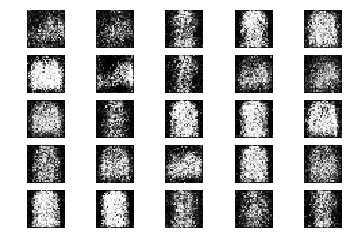

551 [D loss: 0.587712, acc.: 67.19%] [G loss: 1.009717]
552 [D loss: 0.573985, acc.: 68.75%] [G loss: 1.058537]
553 [D loss: 0.574235, acc.: 75.00%] [G loss: 1.143677]
554 [D loss: 0.574194, acc.: 75.00%] [G loss: 1.104894]
555 [D loss: 0.534729, acc.: 75.00%] [G loss: 1.120435]
556 [D loss: 0.666847, acc.: 60.94%] [G loss: 1.073140]
557 [D loss: 0.584201, acc.: 73.44%] [G loss: 0.968021]
558 [D loss: 0.452981, acc.: 81.25%] [G loss: 1.171534]
559 [D loss: 0.486744, acc.: 81.25%] [G loss: 1.196062]
560 [D loss: 0.528987, acc.: 73.44%] [G loss: 1.112714]
561 [D loss: 0.566604, acc.: 71.88%] [G loss: 1.106389]
562 [D loss: 0.540644, acc.: 68.75%] [G loss: 1.097363]
563 [D loss: 0.569854, acc.: 73.44%] [G loss: 1.124765]
564 [D loss: 0.618212, acc.: 75.00%] [G loss: 1.134903]
565 [D loss: 0.513851, acc.: 79.69%] [G loss: 1.055367]
566 [D loss: 0.472840, acc.: 78.12%] [G loss: 1.169361]
567 [D loss: 0.530306, acc.: 75.00%] [G loss: 1.226324]
568 [D loss: 0.451652, acc.: 79.69%] [G loss: 1.

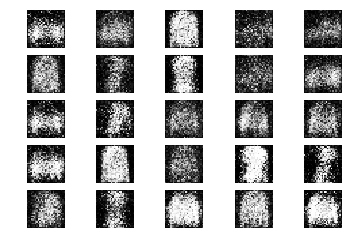

601 [D loss: 0.481536, acc.: 81.25%] [G loss: 1.232345]
602 [D loss: 0.544503, acc.: 75.00%] [G loss: 1.220790]
603 [D loss: 0.624791, acc.: 70.31%] [G loss: 1.093948]
604 [D loss: 0.571311, acc.: 67.19%] [G loss: 1.094219]
605 [D loss: 0.538830, acc.: 73.44%] [G loss: 1.206329]
606 [D loss: 0.619906, acc.: 64.06%] [G loss: 1.204087]
607 [D loss: 0.680750, acc.: 57.81%] [G loss: 1.072792]
608 [D loss: 0.547235, acc.: 75.00%] [G loss: 1.169210]
609 [D loss: 0.601636, acc.: 60.94%] [G loss: 1.219167]
610 [D loss: 0.591210, acc.: 71.88%] [G loss: 1.248074]
611 [D loss: 0.653311, acc.: 67.19%] [G loss: 1.178194]
612 [D loss: 0.621963, acc.: 73.44%] [G loss: 1.143474]
613 [D loss: 0.588091, acc.: 70.31%] [G loss: 1.199164]
614 [D loss: 0.653299, acc.: 60.94%] [G loss: 1.148193]
615 [D loss: 0.591507, acc.: 70.31%] [G loss: 1.093881]
616 [D loss: 0.690532, acc.: 56.25%] [G loss: 1.192924]
617 [D loss: 0.696134, acc.: 59.38%] [G loss: 0.974324]
618 [D loss: 0.565784, acc.: 75.00%] [G loss: 1.

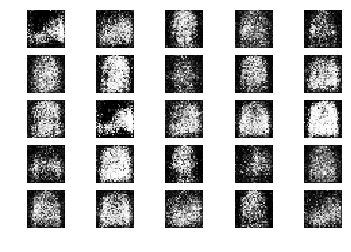

651 [D loss: 0.547668, acc.: 78.12%] [G loss: 0.992516]
652 [D loss: 0.648327, acc.: 67.19%] [G loss: 0.984115]
653 [D loss: 0.554126, acc.: 68.75%] [G loss: 1.087794]
654 [D loss: 0.548948, acc.: 76.56%] [G loss: 1.151391]
655 [D loss: 0.548502, acc.: 65.62%] [G loss: 1.082751]
656 [D loss: 0.695063, acc.: 56.25%] [G loss: 1.038442]
657 [D loss: 0.600291, acc.: 73.44%] [G loss: 1.048840]
658 [D loss: 0.516708, acc.: 82.81%] [G loss: 1.079005]
659 [D loss: 0.705709, acc.: 56.25%] [G loss: 0.948027]
660 [D loss: 0.537834, acc.: 76.56%] [G loss: 1.018647]
661 [D loss: 0.646543, acc.: 64.06%] [G loss: 1.047927]
662 [D loss: 0.540523, acc.: 73.44%] [G loss: 1.053063]
663 [D loss: 0.560844, acc.: 75.00%] [G loss: 1.076853]
664 [D loss: 0.540007, acc.: 76.56%] [G loss: 1.139984]
665 [D loss: 0.634688, acc.: 65.62%] [G loss: 1.118729]
666 [D loss: 0.604856, acc.: 73.44%] [G loss: 1.089480]
667 [D loss: 0.602079, acc.: 67.19%] [G loss: 1.054621]
668 [D loss: 0.597967, acc.: 71.88%] [G loss: 1.

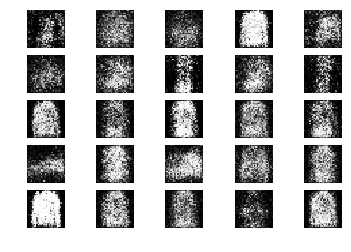

701 [D loss: 0.556136, acc.: 78.12%] [G loss: 0.994003]
702 [D loss: 0.578716, acc.: 67.19%] [G loss: 1.031413]
703 [D loss: 0.603709, acc.: 71.88%] [G loss: 0.923774]
704 [D loss: 0.575614, acc.: 67.19%] [G loss: 0.974984]
705 [D loss: 0.623361, acc.: 65.62%] [G loss: 1.076264]
706 [D loss: 0.552715, acc.: 75.00%] [G loss: 0.972645]
707 [D loss: 0.592320, acc.: 67.19%] [G loss: 1.052361]
708 [D loss: 0.635811, acc.: 65.62%] [G loss: 1.060786]
709 [D loss: 0.553020, acc.: 70.31%] [G loss: 1.094794]
710 [D loss: 0.592675, acc.: 70.31%] [G loss: 1.060450]
711 [D loss: 0.528029, acc.: 79.69%] [G loss: 1.033782]
712 [D loss: 0.556395, acc.: 79.69%] [G loss: 1.038125]
713 [D loss: 0.515565, acc.: 81.25%] [G loss: 1.084242]
714 [D loss: 0.518915, acc.: 75.00%] [G loss: 1.060389]
715 [D loss: 0.540697, acc.: 73.44%] [G loss: 1.052280]
716 [D loss: 0.558867, acc.: 75.00%] [G loss: 1.061636]
717 [D loss: 0.643216, acc.: 62.50%] [G loss: 1.125610]
718 [D loss: 0.583241, acc.: 68.75%] [G loss: 1.

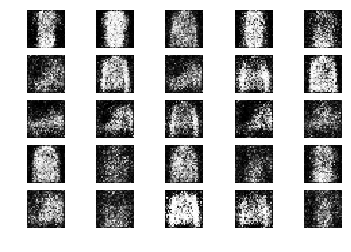

751 [D loss: 0.653489, acc.: 57.81%] [G loss: 0.908914]
752 [D loss: 0.565784, acc.: 75.00%] [G loss: 0.972007]
753 [D loss: 0.539635, acc.: 71.88%] [G loss: 1.013222]
754 [D loss: 0.541823, acc.: 81.25%] [G loss: 1.134717]
755 [D loss: 0.590638, acc.: 68.75%] [G loss: 1.113916]
756 [D loss: 0.553077, acc.: 68.75%] [G loss: 1.014130]
757 [D loss: 0.686561, acc.: 57.81%] [G loss: 1.015602]
758 [D loss: 0.640653, acc.: 60.94%] [G loss: 1.010986]
759 [D loss: 0.650386, acc.: 57.81%] [G loss: 0.981683]
760 [D loss: 0.564524, acc.: 67.19%] [G loss: 0.998854]
761 [D loss: 0.573860, acc.: 68.75%] [G loss: 1.044920]
762 [D loss: 0.588839, acc.: 65.62%] [G loss: 1.002185]
763 [D loss: 0.566445, acc.: 70.31%] [G loss: 0.975692]
764 [D loss: 0.557783, acc.: 75.00%] [G loss: 0.973582]
765 [D loss: 0.533069, acc.: 75.00%] [G loss: 0.969139]
766 [D loss: 0.586661, acc.: 68.75%] [G loss: 1.080316]
767 [D loss: 0.573776, acc.: 68.75%] [G loss: 1.091393]
768 [D loss: 0.603101, acc.: 64.06%] [G loss: 1.

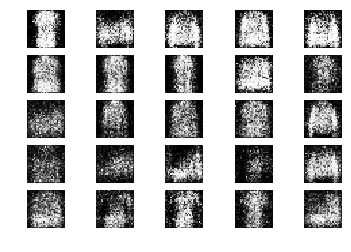

801 [D loss: 0.598253, acc.: 64.06%] [G loss: 1.036581]
802 [D loss: 0.585654, acc.: 70.31%] [G loss: 1.081500]
803 [D loss: 0.550961, acc.: 75.00%] [G loss: 0.988635]
804 [D loss: 0.624179, acc.: 59.38%] [G loss: 0.946727]
805 [D loss: 0.577329, acc.: 75.00%] [G loss: 0.992449]
806 [D loss: 0.515590, acc.: 79.69%] [G loss: 1.084150]
807 [D loss: 0.638786, acc.: 62.50%] [G loss: 1.060871]
808 [D loss: 0.583913, acc.: 67.19%] [G loss: 1.062268]
809 [D loss: 0.535876, acc.: 71.88%] [G loss: 1.220954]
810 [D loss: 0.628564, acc.: 60.94%] [G loss: 1.073822]
811 [D loss: 0.628626, acc.: 62.50%] [G loss: 1.100327]
812 [D loss: 0.616319, acc.: 64.06%] [G loss: 1.034351]
813 [D loss: 0.627283, acc.: 62.50%] [G loss: 1.020407]
814 [D loss: 0.679383, acc.: 59.38%] [G loss: 0.907103]
815 [D loss: 0.567020, acc.: 67.19%] [G loss: 1.101653]
816 [D loss: 0.597054, acc.: 65.62%] [G loss: 1.024588]
817 [D loss: 0.608037, acc.: 60.94%] [G loss: 1.005630]
818 [D loss: 0.589537, acc.: 64.06%] [G loss: 0.

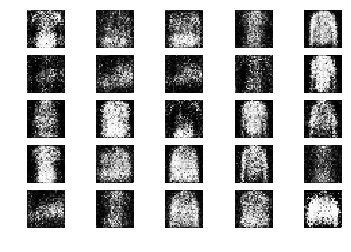

851 [D loss: 0.615866, acc.: 64.06%] [G loss: 0.988888]
852 [D loss: 0.614333, acc.: 59.38%] [G loss: 0.920748]
853 [D loss: 0.656451, acc.: 57.81%] [G loss: 0.944132]
854 [D loss: 0.627673, acc.: 68.75%] [G loss: 0.997869]
855 [D loss: 0.629004, acc.: 65.62%] [G loss: 0.935565]
856 [D loss: 0.588463, acc.: 75.00%] [G loss: 0.919265]
857 [D loss: 0.615213, acc.: 60.94%] [G loss: 0.932030]
858 [D loss: 0.591394, acc.: 70.31%] [G loss: 0.970448]
859 [D loss: 0.608112, acc.: 65.62%] [G loss: 0.996977]
860 [D loss: 0.666316, acc.: 56.25%] [G loss: 0.958732]
861 [D loss: 0.603014, acc.: 65.62%] [G loss: 0.958343]
862 [D loss: 0.616871, acc.: 68.75%] [G loss: 1.006844]
863 [D loss: 0.631088, acc.: 64.06%] [G loss: 0.981273]
864 [D loss: 0.578392, acc.: 71.88%] [G loss: 0.825276]
865 [D loss: 0.627562, acc.: 57.81%] [G loss: 0.814836]
866 [D loss: 0.571144, acc.: 71.88%] [G loss: 1.032343]
867 [D loss: 0.552868, acc.: 75.00%] [G loss: 0.889876]
868 [D loss: 0.680840, acc.: 60.94%] [G loss: 0.

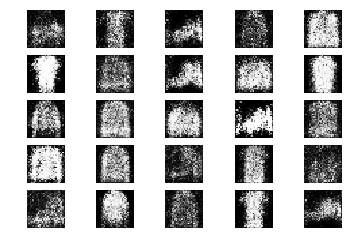

901 [D loss: 0.551569, acc.: 71.88%] [G loss: 0.960103]
902 [D loss: 0.621904, acc.: 68.75%] [G loss: 0.917761]
903 [D loss: 0.556844, acc.: 68.75%] [G loss: 1.024412]
904 [D loss: 0.574605, acc.: 70.31%] [G loss: 0.865415]
905 [D loss: 0.547006, acc.: 76.56%] [G loss: 0.883901]
906 [D loss: 0.625368, acc.: 60.94%] [G loss: 1.129520]
907 [D loss: 0.585071, acc.: 73.44%] [G loss: 0.984919]
908 [D loss: 0.680663, acc.: 51.56%] [G loss: 1.090592]
909 [D loss: 0.603452, acc.: 68.75%] [G loss: 0.976658]
910 [D loss: 0.622380, acc.: 65.62%] [G loss: 1.000715]
911 [D loss: 0.637601, acc.: 59.38%] [G loss: 1.016587]
912 [D loss: 0.620555, acc.: 57.81%] [G loss: 1.055565]
913 [D loss: 0.579053, acc.: 73.44%] [G loss: 0.982778]
914 [D loss: 0.653519, acc.: 50.00%] [G loss: 1.069659]
915 [D loss: 0.618445, acc.: 70.31%] [G loss: 1.079780]
916 [D loss: 0.648174, acc.: 59.38%] [G loss: 0.833423]
917 [D loss: 0.601806, acc.: 59.38%] [G loss: 0.880351]
918 [D loss: 0.531405, acc.: 78.12%] [G loss: 0.

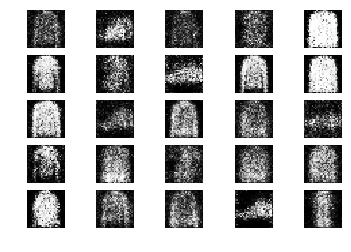

951 [D loss: 0.571743, acc.: 75.00%] [G loss: 0.993660]
952 [D loss: 0.608829, acc.: 71.88%] [G loss: 1.013429]
953 [D loss: 0.656294, acc.: 62.50%] [G loss: 0.877406]
954 [D loss: 0.574939, acc.: 71.88%] [G loss: 0.978278]
955 [D loss: 0.596768, acc.: 73.44%] [G loss: 0.876107]
956 [D loss: 0.645657, acc.: 64.06%] [G loss: 0.916662]
957 [D loss: 0.604182, acc.: 65.62%] [G loss: 0.992545]
958 [D loss: 0.603939, acc.: 67.19%] [G loss: 0.984701]
959 [D loss: 0.648328, acc.: 64.06%] [G loss: 1.013932]
960 [D loss: 0.558133, acc.: 71.88%] [G loss: 1.023104]
961 [D loss: 0.683879, acc.: 51.56%] [G loss: 0.987985]
962 [D loss: 0.604014, acc.: 67.19%] [G loss: 1.086030]
963 [D loss: 0.680018, acc.: 60.94%] [G loss: 0.985138]
964 [D loss: 0.592039, acc.: 70.31%] [G loss: 0.939140]
965 [D loss: 0.564654, acc.: 65.62%] [G loss: 1.010701]
966 [D loss: 0.720849, acc.: 56.25%] [G loss: 0.964770]
967 [D loss: 0.621494, acc.: 70.31%] [G loss: 0.931978]
968 [D loss: 0.552963, acc.: 75.00%] [G loss: 0.

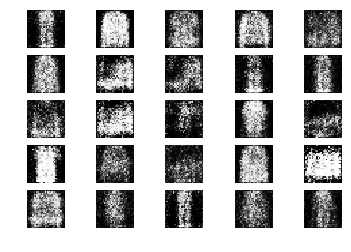

1001 [D loss: 0.593630, acc.: 68.75%] [G loss: 0.970255]
1002 [D loss: 0.543590, acc.: 75.00%] [G loss: 1.052890]
1003 [D loss: 0.652793, acc.: 59.38%] [G loss: 1.013627]
1004 [D loss: 0.528666, acc.: 79.69%] [G loss: 1.084879]
1005 [D loss: 0.498425, acc.: 79.69%] [G loss: 1.024974]
1006 [D loss: 0.667425, acc.: 51.56%] [G loss: 1.078886]
1007 [D loss: 0.615017, acc.: 70.31%] [G loss: 1.169026]
1008 [D loss: 0.602950, acc.: 67.19%] [G loss: 1.018705]
1009 [D loss: 0.703776, acc.: 50.00%] [G loss: 0.921609]
1010 [D loss: 0.537603, acc.: 76.56%] [G loss: 0.808702]
1011 [D loss: 0.597091, acc.: 71.88%] [G loss: 0.900751]
1012 [D loss: 0.577054, acc.: 71.88%] [G loss: 0.901944]
1013 [D loss: 0.604236, acc.: 59.38%] [G loss: 0.993545]
1014 [D loss: 0.565581, acc.: 76.56%] [G loss: 0.945847]
1015 [D loss: 0.613576, acc.: 56.25%] [G loss: 0.930887]
1016 [D loss: 0.612259, acc.: 67.19%] [G loss: 0.946020]
1017 [D loss: 0.667025, acc.: 56.25%] [G loss: 0.982146]
1018 [D loss: 0.635785, acc.: 6

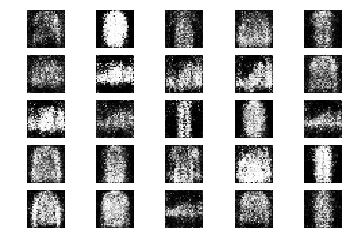

1051 [D loss: 0.683415, acc.: 64.06%] [G loss: 0.858388]
1052 [D loss: 0.629869, acc.: 60.94%] [G loss: 0.875992]
1053 [D loss: 0.552214, acc.: 76.56%] [G loss: 0.871043]
1054 [D loss: 0.607309, acc.: 67.19%] [G loss: 0.883170]
1055 [D loss: 0.578032, acc.: 67.19%] [G loss: 0.940760]
1056 [D loss: 0.612675, acc.: 68.75%] [G loss: 0.923177]
1057 [D loss: 0.610026, acc.: 68.75%] [G loss: 0.971146]
1058 [D loss: 0.568063, acc.: 70.31%] [G loss: 0.923037]
1059 [D loss: 0.628754, acc.: 67.19%] [G loss: 0.962808]
1060 [D loss: 0.583330, acc.: 73.44%] [G loss: 0.924719]
1061 [D loss: 0.636536, acc.: 65.62%] [G loss: 0.981400]
1062 [D loss: 0.607315, acc.: 70.31%] [G loss: 0.965220]
1063 [D loss: 0.599553, acc.: 62.50%] [G loss: 0.978931]
1064 [D loss: 0.689675, acc.: 53.12%] [G loss: 0.937149]
1065 [D loss: 0.556600, acc.: 71.88%] [G loss: 0.974544]
1066 [D loss: 0.570853, acc.: 70.31%] [G loss: 0.851803]
1067 [D loss: 0.605052, acc.: 62.50%] [G loss: 1.000415]
1068 [D loss: 0.619566, acc.: 5

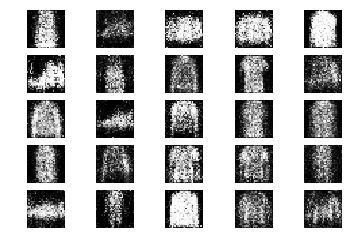

1101 [D loss: 0.662257, acc.: 56.25%] [G loss: 0.983609]
1102 [D loss: 0.696165, acc.: 54.69%] [G loss: 0.837661]
1103 [D loss: 0.562812, acc.: 70.31%] [G loss: 0.896785]
1104 [D loss: 0.619648, acc.: 62.50%] [G loss: 0.921419]
1105 [D loss: 0.625128, acc.: 64.06%] [G loss: 0.988225]
1106 [D loss: 0.653923, acc.: 68.75%] [G loss: 1.029563]
1107 [D loss: 0.582281, acc.: 73.44%] [G loss: 0.942508]
1108 [D loss: 0.648066, acc.: 60.94%] [G loss: 0.817318]
1109 [D loss: 0.628863, acc.: 65.62%] [G loss: 0.972772]
1110 [D loss: 0.594320, acc.: 65.62%] [G loss: 1.008995]
1111 [D loss: 0.655037, acc.: 67.19%] [G loss: 0.881819]
1112 [D loss: 0.640695, acc.: 67.19%] [G loss: 0.893576]
1113 [D loss: 0.633565, acc.: 62.50%] [G loss: 0.942327]
1114 [D loss: 0.595729, acc.: 71.88%] [G loss: 0.958830]
1115 [D loss: 0.590391, acc.: 70.31%] [G loss: 0.850637]
1116 [D loss: 0.594403, acc.: 75.00%] [G loss: 0.791016]
1117 [D loss: 0.583887, acc.: 67.19%] [G loss: 0.932884]
1118 [D loss: 0.639777, acc.: 5

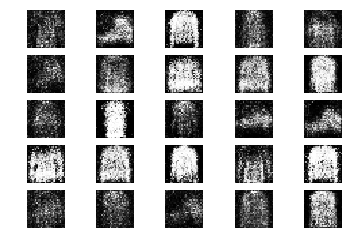

1151 [D loss: 0.600502, acc.: 68.75%] [G loss: 0.983669]
1152 [D loss: 0.601436, acc.: 67.19%] [G loss: 0.963200]
1153 [D loss: 0.629146, acc.: 67.19%] [G loss: 0.875651]
1154 [D loss: 0.604992, acc.: 70.31%] [G loss: 0.944013]
1155 [D loss: 0.582673, acc.: 70.31%] [G loss: 0.918725]
1156 [D loss: 0.585090, acc.: 78.12%] [G loss: 0.957094]
1157 [D loss: 0.538465, acc.: 82.81%] [G loss: 0.945403]
1158 [D loss: 0.612163, acc.: 71.88%] [G loss: 0.919500]
1159 [D loss: 0.524621, acc.: 76.56%] [G loss: 1.023702]
1160 [D loss: 0.584162, acc.: 70.31%] [G loss: 1.001840]
1161 [D loss: 0.684306, acc.: 57.81%] [G loss: 0.907382]
1162 [D loss: 0.554018, acc.: 73.44%] [G loss: 0.905540]
1163 [D loss: 0.607438, acc.: 65.62%] [G loss: 0.820634]
1164 [D loss: 0.635108, acc.: 67.19%] [G loss: 0.875679]
1165 [D loss: 0.546199, acc.: 68.75%] [G loss: 1.020663]
1166 [D loss: 0.562529, acc.: 75.00%] [G loss: 1.037480]
1167 [D loss: 0.663638, acc.: 62.50%] [G loss: 0.995459]
1168 [D loss: 0.623354, acc.: 6

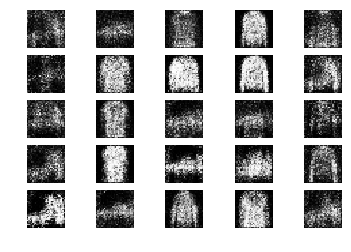

1201 [D loss: 0.662814, acc.: 62.50%] [G loss: 0.953156]
1202 [D loss: 0.607312, acc.: 65.62%] [G loss: 0.951558]
1203 [D loss: 0.599265, acc.: 62.50%] [G loss: 0.908223]
1204 [D loss: 0.610177, acc.: 64.06%] [G loss: 0.952657]
1205 [D loss: 0.550623, acc.: 71.88%] [G loss: 0.875086]
1206 [D loss: 0.560811, acc.: 64.06%] [G loss: 1.030773]
1207 [D loss: 0.576241, acc.: 67.19%] [G loss: 1.032223]
1208 [D loss: 0.665121, acc.: 62.50%] [G loss: 0.994258]
1209 [D loss: 0.602809, acc.: 67.19%] [G loss: 0.934918]
1210 [D loss: 0.631043, acc.: 64.06%] [G loss: 1.023525]
1211 [D loss: 0.538144, acc.: 76.56%] [G loss: 1.019197]
1212 [D loss: 0.640871, acc.: 64.06%] [G loss: 0.947651]
1213 [D loss: 0.509557, acc.: 81.25%] [G loss: 0.880609]
1214 [D loss: 0.616371, acc.: 68.75%] [G loss: 0.843892]
1215 [D loss: 0.584330, acc.: 64.06%] [G loss: 0.899006]
1216 [D loss: 0.643580, acc.: 65.62%] [G loss: 0.872899]
1217 [D loss: 0.585497, acc.: 70.31%] [G loss: 0.990475]
1218 [D loss: 0.657494, acc.: 6

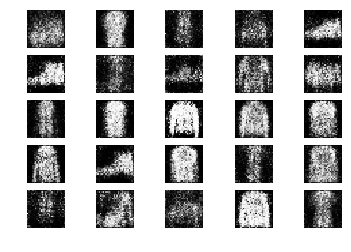

1251 [D loss: 0.600798, acc.: 70.31%] [G loss: 0.855230]
1252 [D loss: 0.543158, acc.: 76.56%] [G loss: 0.936240]
1253 [D loss: 0.555650, acc.: 70.31%] [G loss: 0.852746]
1254 [D loss: 0.616202, acc.: 67.19%] [G loss: 0.891109]
1255 [D loss: 0.593388, acc.: 68.75%] [G loss: 0.888517]
1256 [D loss: 0.653051, acc.: 57.81%] [G loss: 0.841863]
1257 [D loss: 0.649710, acc.: 59.38%] [G loss: 0.882272]
1258 [D loss: 0.727374, acc.: 54.69%] [G loss: 0.893816]
1259 [D loss: 0.679672, acc.: 53.12%] [G loss: 0.940039]
1260 [D loss: 0.643982, acc.: 56.25%] [G loss: 0.997873]
1261 [D loss: 0.609607, acc.: 65.62%] [G loss: 0.906521]
1262 [D loss: 0.637957, acc.: 57.81%] [G loss: 0.902629]
1263 [D loss: 0.614453, acc.: 64.06%] [G loss: 0.948269]
1264 [D loss: 0.587578, acc.: 70.31%] [G loss: 0.943861]
1265 [D loss: 0.709658, acc.: 54.69%] [G loss: 0.913077]
1266 [D loss: 0.593633, acc.: 67.19%] [G loss: 0.954670]
1267 [D loss: 0.658931, acc.: 59.38%] [G loss: 0.896675]
1268 [D loss: 0.571750, acc.: 7

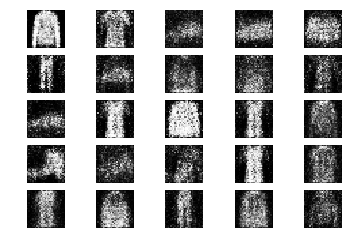

1301 [D loss: 0.658742, acc.: 56.25%] [G loss: 0.924010]
1302 [D loss: 0.583144, acc.: 79.69%] [G loss: 0.951852]
1303 [D loss: 0.606757, acc.: 70.31%] [G loss: 0.876737]
1304 [D loss: 0.637222, acc.: 64.06%] [G loss: 0.949480]
1305 [D loss: 0.634138, acc.: 65.62%] [G loss: 0.858287]
1306 [D loss: 0.650475, acc.: 64.06%] [G loss: 0.864884]
1307 [D loss: 0.618384, acc.: 68.75%] [G loss: 0.835025]
1308 [D loss: 0.645225, acc.: 59.38%] [G loss: 0.862145]
1309 [D loss: 0.633069, acc.: 65.62%] [G loss: 0.942670]
1310 [D loss: 0.612045, acc.: 56.25%] [G loss: 0.865776]
1311 [D loss: 0.619205, acc.: 67.19%] [G loss: 0.894271]
1312 [D loss: 0.646603, acc.: 57.81%] [G loss: 0.925582]
1313 [D loss: 0.641988, acc.: 64.06%] [G loss: 0.951061]
1314 [D loss: 0.589229, acc.: 70.31%] [G loss: 0.966935]
1315 [D loss: 0.690908, acc.: 60.94%] [G loss: 0.979542]
1316 [D loss: 0.653132, acc.: 60.94%] [G loss: 0.959310]
1317 [D loss: 0.679453, acc.: 57.81%] [G loss: 0.890357]
1318 [D loss: 0.604015, acc.: 6

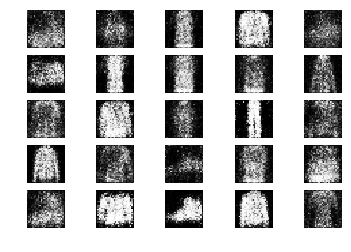

1351 [D loss: 0.656689, acc.: 64.06%] [G loss: 0.858248]
1352 [D loss: 0.645008, acc.: 59.38%] [G loss: 0.845448]
1353 [D loss: 0.623374, acc.: 60.94%] [G loss: 0.923056]
1354 [D loss: 0.647050, acc.: 64.06%] [G loss: 0.961227]
1355 [D loss: 0.633328, acc.: 62.50%] [G loss: 0.923757]
1356 [D loss: 0.605497, acc.: 70.31%] [G loss: 1.000168]
1357 [D loss: 0.633981, acc.: 65.62%] [G loss: 0.928792]
1358 [D loss: 0.612172, acc.: 67.19%] [G loss: 0.944603]
1359 [D loss: 0.611486, acc.: 71.88%] [G loss: 0.923063]
1360 [D loss: 0.590344, acc.: 71.88%] [G loss: 0.907372]
1361 [D loss: 0.602129, acc.: 75.00%] [G loss: 0.803521]
1362 [D loss: 0.653388, acc.: 62.50%] [G loss: 0.881992]
1363 [D loss: 0.627752, acc.: 65.62%] [G loss: 0.810756]
1364 [D loss: 0.644533, acc.: 62.50%] [G loss: 0.925007]
1365 [D loss: 0.733206, acc.: 50.00%] [G loss: 0.935473]
1366 [D loss: 0.597626, acc.: 70.31%] [G loss: 0.988623]
1367 [D loss: 0.623287, acc.: 65.62%] [G loss: 0.930830]
1368 [D loss: 0.709759, acc.: 5

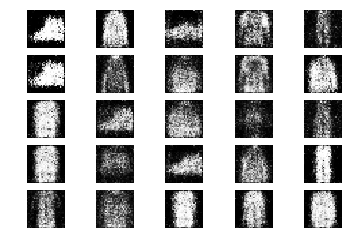

1401 [D loss: 0.646931, acc.: 62.50%] [G loss: 0.888458]
1402 [D loss: 0.549818, acc.: 79.69%] [G loss: 0.906962]
1403 [D loss: 0.578412, acc.: 73.44%] [G loss: 0.923091]
1404 [D loss: 0.579763, acc.: 65.62%] [G loss: 0.913962]
1405 [D loss: 0.616378, acc.: 67.19%] [G loss: 0.958078]
1406 [D loss: 0.581082, acc.: 73.44%] [G loss: 1.023555]
1407 [D loss: 0.580509, acc.: 76.56%] [G loss: 0.924163]
1408 [D loss: 0.598753, acc.: 62.50%] [G loss: 0.963302]
1409 [D loss: 0.592902, acc.: 60.94%] [G loss: 0.889133]
1410 [D loss: 0.649649, acc.: 54.69%] [G loss: 0.876879]
1411 [D loss: 0.607753, acc.: 65.62%] [G loss: 0.892629]
1412 [D loss: 0.593866, acc.: 65.62%] [G loss: 0.843092]
1413 [D loss: 0.672286, acc.: 57.81%] [G loss: 0.822369]
1414 [D loss: 0.582990, acc.: 76.56%] [G loss: 0.866469]
1415 [D loss: 0.661392, acc.: 57.81%] [G loss: 0.907506]
1416 [D loss: 0.631422, acc.: 65.62%] [G loss: 0.865063]
1417 [D loss: 0.622002, acc.: 68.75%] [G loss: 0.874006]
1418 [D loss: 0.600080, acc.: 7

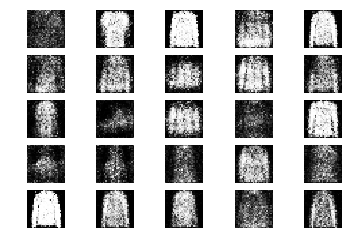

1451 [D loss: 0.672776, acc.: 54.69%] [G loss: 0.954466]
1452 [D loss: 0.660238, acc.: 57.81%] [G loss: 0.950552]
1453 [D loss: 0.657926, acc.: 54.69%] [G loss: 0.937304]
1454 [D loss: 0.657162, acc.: 64.06%] [G loss: 1.010719]
1455 [D loss: 0.648817, acc.: 64.06%] [G loss: 0.969387]
1456 [D loss: 0.597835, acc.: 70.31%] [G loss: 0.939435]
1457 [D loss: 0.696862, acc.: 53.12%] [G loss: 0.877520]
1458 [D loss: 0.622366, acc.: 70.31%] [G loss: 0.878788]
1459 [D loss: 0.636169, acc.: 62.50%] [G loss: 0.931641]
1460 [D loss: 0.665587, acc.: 54.69%] [G loss: 0.899116]
1461 [D loss: 0.589778, acc.: 71.88%] [G loss: 0.901697]
1462 [D loss: 0.604586, acc.: 67.19%] [G loss: 0.985114]
1463 [D loss: 0.642869, acc.: 57.81%] [G loss: 0.902717]
1464 [D loss: 0.627707, acc.: 60.94%] [G loss: 1.070430]
1465 [D loss: 0.569884, acc.: 75.00%] [G loss: 0.993425]
1466 [D loss: 0.582255, acc.: 73.44%] [G loss: 0.827174]
1467 [D loss: 0.598022, acc.: 71.88%] [G loss: 0.947946]
1468 [D loss: 0.617582, acc.: 6

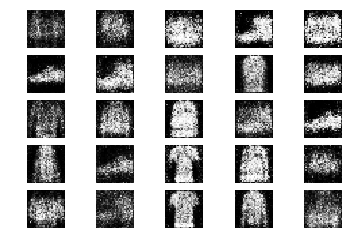

1501 [D loss: 0.595067, acc.: 71.88%] [G loss: 0.902246]
1502 [D loss: 0.609095, acc.: 70.31%] [G loss: 0.950930]
1503 [D loss: 0.603877, acc.: 70.31%] [G loss: 0.893127]
1504 [D loss: 0.640878, acc.: 68.75%] [G loss: 1.024982]
1505 [D loss: 0.629296, acc.: 68.75%] [G loss: 0.875660]
1506 [D loss: 0.630166, acc.: 60.94%] [G loss: 0.957286]
1507 [D loss: 0.659142, acc.: 57.81%] [G loss: 0.855328]
1508 [D loss: 0.602607, acc.: 73.44%] [G loss: 0.893266]
1509 [D loss: 0.641698, acc.: 62.50%] [G loss: 0.974555]
1510 [D loss: 0.634082, acc.: 68.75%] [G loss: 0.976738]
1511 [D loss: 0.595751, acc.: 68.75%] [G loss: 0.872637]
1512 [D loss: 0.702288, acc.: 56.25%] [G loss: 0.827218]
1513 [D loss: 0.615906, acc.: 70.31%] [G loss: 0.895599]
1514 [D loss: 0.689904, acc.: 60.94%] [G loss: 0.929762]
1515 [D loss: 0.621797, acc.: 57.81%] [G loss: 0.847097]
1516 [D loss: 0.616045, acc.: 65.62%] [G loss: 0.796343]
1517 [D loss: 0.609122, acc.: 62.50%] [G loss: 0.929224]
1518 [D loss: 0.561669, acc.: 7

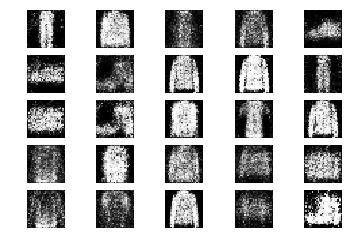

1551 [D loss: 0.675148, acc.: 62.50%] [G loss: 0.833214]
1552 [D loss: 0.599199, acc.: 71.88%] [G loss: 0.943791]
1553 [D loss: 0.648740, acc.: 68.75%] [G loss: 0.877601]
1554 [D loss: 0.611334, acc.: 62.50%] [G loss: 0.912943]
1555 [D loss: 0.614954, acc.: 64.06%] [G loss: 0.876026]
1556 [D loss: 0.584179, acc.: 71.88%] [G loss: 0.954992]
1557 [D loss: 0.623904, acc.: 67.19%] [G loss: 0.884598]
1558 [D loss: 0.683252, acc.: 56.25%] [G loss: 0.932019]
1559 [D loss: 0.604894, acc.: 65.62%] [G loss: 0.857863]
1560 [D loss: 0.610650, acc.: 64.06%] [G loss: 0.949945]
1561 [D loss: 0.606257, acc.: 64.06%] [G loss: 0.969233]
1562 [D loss: 0.612733, acc.: 65.62%] [G loss: 0.908090]
1563 [D loss: 0.612995, acc.: 68.75%] [G loss: 0.887249]
1564 [D loss: 0.639002, acc.: 54.69%] [G loss: 0.893687]
1565 [D loss: 0.619201, acc.: 68.75%] [G loss: 0.850171]
1566 [D loss: 0.614561, acc.: 64.06%] [G loss: 0.873078]
1567 [D loss: 0.585758, acc.: 67.19%] [G loss: 0.954609]
1568 [D loss: 0.644053, acc.: 5

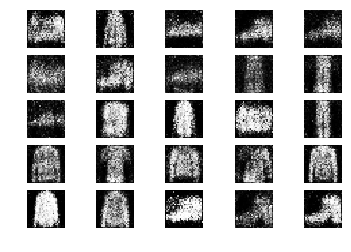

1601 [D loss: 0.587305, acc.: 71.88%] [G loss: 0.961264]
1602 [D loss: 0.629844, acc.: 59.38%] [G loss: 0.927663]
1603 [D loss: 0.676224, acc.: 56.25%] [G loss: 0.913842]
1604 [D loss: 0.632464, acc.: 65.62%] [G loss: 0.898219]
1605 [D loss: 0.660832, acc.: 62.50%] [G loss: 0.980177]
1606 [D loss: 0.564260, acc.: 71.88%] [G loss: 0.939241]
1607 [D loss: 0.655921, acc.: 62.50%] [G loss: 0.987217]
1608 [D loss: 0.613825, acc.: 71.88%] [G loss: 0.952056]
1609 [D loss: 0.545286, acc.: 81.25%] [G loss: 0.879843]
1610 [D loss: 0.563871, acc.: 75.00%] [G loss: 0.926707]
1611 [D loss: 0.718112, acc.: 54.69%] [G loss: 0.928711]
1612 [D loss: 0.609335, acc.: 65.62%] [G loss: 0.866681]
1613 [D loss: 0.600169, acc.: 68.75%] [G loss: 0.975881]
1614 [D loss: 0.582350, acc.: 73.44%] [G loss: 0.967095]
1615 [D loss: 0.597293, acc.: 65.62%] [G loss: 0.907772]
1616 [D loss: 0.577345, acc.: 71.88%] [G loss: 0.855506]
1617 [D loss: 0.624695, acc.: 64.06%] [G loss: 0.914548]
1618 [D loss: 0.656841, acc.: 6

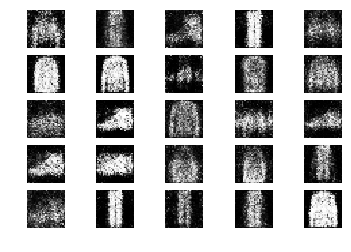

1651 [D loss: 0.586643, acc.: 64.06%] [G loss: 0.934483]
1652 [D loss: 0.617950, acc.: 65.62%] [G loss: 0.968175]
1653 [D loss: 0.685252, acc.: 57.81%] [G loss: 0.909315]
1654 [D loss: 0.594035, acc.: 71.88%] [G loss: 0.883214]
1655 [D loss: 0.661452, acc.: 56.25%] [G loss: 0.924079]
1656 [D loss: 0.651330, acc.: 64.06%] [G loss: 0.948133]
1657 [D loss: 0.698129, acc.: 62.50%] [G loss: 0.858832]
1658 [D loss: 0.632358, acc.: 64.06%] [G loss: 0.924537]
1659 [D loss: 0.593783, acc.: 75.00%] [G loss: 0.908243]
1660 [D loss: 0.603580, acc.: 70.31%] [G loss: 0.910737]
1661 [D loss: 0.591074, acc.: 68.75%] [G loss: 0.961412]
1662 [D loss: 0.645379, acc.: 64.06%] [G loss: 0.872760]
1663 [D loss: 0.624507, acc.: 62.50%] [G loss: 0.807270]
1664 [D loss: 0.678356, acc.: 60.94%] [G loss: 0.894482]
1665 [D loss: 0.676249, acc.: 56.25%] [G loss: 0.986916]
1666 [D loss: 0.618559, acc.: 67.19%] [G loss: 0.895559]
1667 [D loss: 0.634569, acc.: 60.94%] [G loss: 0.877430]
1668 [D loss: 0.590512, acc.: 7

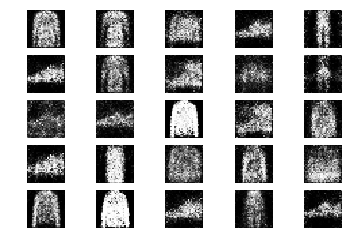

1701 [D loss: 0.613765, acc.: 68.75%] [G loss: 0.914933]
1702 [D loss: 0.650496, acc.: 68.75%] [G loss: 0.822671]
1703 [D loss: 0.588919, acc.: 64.06%] [G loss: 0.913854]
1704 [D loss: 0.636656, acc.: 62.50%] [G loss: 0.903509]
1705 [D loss: 0.559647, acc.: 76.56%] [G loss: 1.006751]
1706 [D loss: 0.573719, acc.: 73.44%] [G loss: 0.929010]
1707 [D loss: 0.637306, acc.: 68.75%] [G loss: 1.001823]
1708 [D loss: 0.539675, acc.: 76.56%] [G loss: 0.952913]
1709 [D loss: 0.577361, acc.: 73.44%] [G loss: 0.952770]
1710 [D loss: 0.605461, acc.: 65.62%] [G loss: 0.798075]
1711 [D loss: 0.637954, acc.: 65.62%] [G loss: 0.884487]
1712 [D loss: 0.570496, acc.: 68.75%] [G loss: 0.929699]
1713 [D loss: 0.609285, acc.: 65.62%] [G loss: 0.911439]
1714 [D loss: 0.664651, acc.: 68.75%] [G loss: 1.026965]
1715 [D loss: 0.606429, acc.: 76.56%] [G loss: 0.964594]
1716 [D loss: 0.631647, acc.: 67.19%] [G loss: 0.901709]
1717 [D loss: 0.631369, acc.: 65.62%] [G loss: 0.970886]
1718 [D loss: 0.541462, acc.: 7

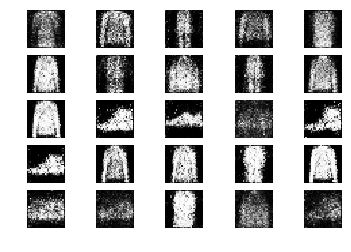

1751 [D loss: 0.565027, acc.: 75.00%] [G loss: 0.884284]
1752 [D loss: 0.520078, acc.: 75.00%] [G loss: 0.984021]
1753 [D loss: 0.576836, acc.: 71.88%] [G loss: 0.951117]
1754 [D loss: 0.625279, acc.: 71.88%] [G loss: 0.953069]
1755 [D loss: 0.600876, acc.: 68.75%] [G loss: 0.981557]
1756 [D loss: 0.570320, acc.: 68.75%] [G loss: 0.958456]
1757 [D loss: 0.676054, acc.: 54.69%] [G loss: 0.911615]
1758 [D loss: 0.652093, acc.: 62.50%] [G loss: 0.963583]
1759 [D loss: 0.590373, acc.: 67.19%] [G loss: 0.861153]
1760 [D loss: 0.657634, acc.: 65.62%] [G loss: 0.911039]
1761 [D loss: 0.677327, acc.: 57.81%] [G loss: 0.898501]
1762 [D loss: 0.579525, acc.: 75.00%] [G loss: 0.988993]
1763 [D loss: 0.647962, acc.: 51.56%] [G loss: 0.962350]
1764 [D loss: 0.623115, acc.: 65.62%] [G loss: 0.958750]
1765 [D loss: 0.661355, acc.: 53.12%] [G loss: 0.972842]
1766 [D loss: 0.655298, acc.: 64.06%] [G loss: 0.945378]
1767 [D loss: 0.593929, acc.: 65.62%] [G loss: 0.971775]
1768 [D loss: 0.646185, acc.: 6

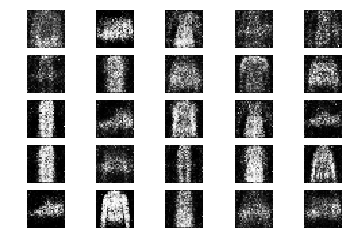

1801 [D loss: 0.657849, acc.: 53.12%] [G loss: 0.904375]
1802 [D loss: 0.604270, acc.: 78.12%] [G loss: 0.914982]
1803 [D loss: 0.637462, acc.: 59.38%] [G loss: 0.825935]
1804 [D loss: 0.632673, acc.: 57.81%] [G loss: 0.860908]
1805 [D loss: 0.552065, acc.: 78.12%] [G loss: 0.820262]
1806 [D loss: 0.694768, acc.: 53.12%] [G loss: 0.888445]
1807 [D loss: 0.620158, acc.: 60.94%] [G loss: 0.889453]
1808 [D loss: 0.620786, acc.: 65.62%] [G loss: 0.939717]
1809 [D loss: 0.652507, acc.: 65.62%] [G loss: 0.923278]
1810 [D loss: 0.588412, acc.: 70.31%] [G loss: 0.828793]
1811 [D loss: 0.570452, acc.: 71.88%] [G loss: 0.877212]
1812 [D loss: 0.598641, acc.: 68.75%] [G loss: 0.952113]
1813 [D loss: 0.579484, acc.: 64.06%] [G loss: 0.956389]
1814 [D loss: 0.663313, acc.: 57.81%] [G loss: 0.987806]
1815 [D loss: 0.609891, acc.: 65.62%] [G loss: 1.005197]
1816 [D loss: 0.612037, acc.: 64.06%] [G loss: 0.949275]
1817 [D loss: 0.668419, acc.: 56.25%] [G loss: 0.890066]
1818 [D loss: 0.551951, acc.: 7

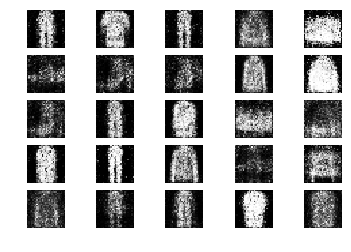

1851 [D loss: 0.582330, acc.: 70.31%] [G loss: 0.933460]
1852 [D loss: 0.560714, acc.: 68.75%] [G loss: 0.823997]
1853 [D loss: 0.620998, acc.: 75.00%] [G loss: 0.888963]
1854 [D loss: 0.641925, acc.: 62.50%] [G loss: 0.921259]
1855 [D loss: 0.570859, acc.: 68.75%] [G loss: 0.922020]
1856 [D loss: 0.613568, acc.: 56.25%] [G loss: 0.887463]
1857 [D loss: 0.572984, acc.: 68.75%] [G loss: 1.010365]
1858 [D loss: 0.631750, acc.: 67.19%] [G loss: 0.879779]
1859 [D loss: 0.633879, acc.: 62.50%] [G loss: 0.870662]
1860 [D loss: 0.599039, acc.: 65.62%] [G loss: 1.007804]
1861 [D loss: 0.599365, acc.: 70.31%] [G loss: 1.021351]
1862 [D loss: 0.579815, acc.: 65.62%] [G loss: 0.929995]
1863 [D loss: 0.617948, acc.: 65.62%] [G loss: 0.924436]
1864 [D loss: 0.656423, acc.: 60.94%] [G loss: 1.059760]
1865 [D loss: 0.541053, acc.: 73.44%] [G loss: 0.975570]
1866 [D loss: 0.638907, acc.: 51.56%] [G loss: 0.849901]
1867 [D loss: 0.579577, acc.: 70.31%] [G loss: 0.839926]
1868 [D loss: 0.589124, acc.: 7

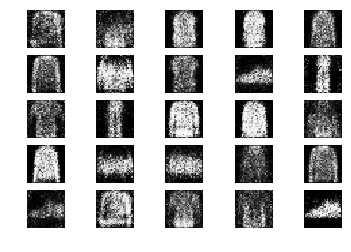

1901 [D loss: 0.623692, acc.: 64.06%] [G loss: 0.928574]
1902 [D loss: 0.568758, acc.: 73.44%] [G loss: 1.052795]
1903 [D loss: 0.593546, acc.: 70.31%] [G loss: 0.965110]
1904 [D loss: 0.567490, acc.: 70.31%] [G loss: 0.825250]
1905 [D loss: 0.644975, acc.: 60.94%] [G loss: 0.945871]
1906 [D loss: 0.587053, acc.: 70.31%] [G loss: 0.872089]
1907 [D loss: 0.606926, acc.: 71.88%] [G loss: 0.861895]
1908 [D loss: 0.650762, acc.: 65.62%] [G loss: 0.933404]
1909 [D loss: 0.579309, acc.: 67.19%] [G loss: 0.940202]
1910 [D loss: 0.633008, acc.: 59.38%] [G loss: 1.003529]
1911 [D loss: 0.597532, acc.: 62.50%] [G loss: 0.978194]
1912 [D loss: 0.597888, acc.: 68.75%] [G loss: 0.942573]
1913 [D loss: 0.641620, acc.: 59.38%] [G loss: 1.039641]
1914 [D loss: 0.548170, acc.: 71.88%] [G loss: 0.981169]
1915 [D loss: 0.618604, acc.: 67.19%] [G loss: 0.960769]
1916 [D loss: 0.586911, acc.: 73.44%] [G loss: 0.981566]
1917 [D loss: 0.637958, acc.: 65.62%] [G loss: 0.917548]
1918 [D loss: 0.640635, acc.: 7

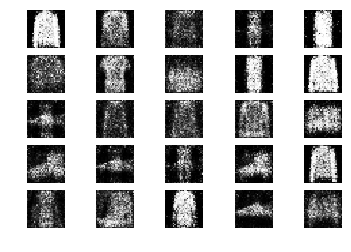

1951 [D loss: 0.621443, acc.: 67.19%] [G loss: 1.018008]
1952 [D loss: 0.609619, acc.: 67.19%] [G loss: 1.076960]
1953 [D loss: 0.599837, acc.: 62.50%] [G loss: 1.039886]
1954 [D loss: 0.684112, acc.: 56.25%] [G loss: 0.946632]
1955 [D loss: 0.624905, acc.: 62.50%] [G loss: 0.861962]
1956 [D loss: 0.620761, acc.: 68.75%] [G loss: 0.926882]
1957 [D loss: 0.569452, acc.: 75.00%] [G loss: 1.000028]
1958 [D loss: 0.562014, acc.: 73.44%] [G loss: 0.920195]
1959 [D loss: 0.580513, acc.: 64.06%] [G loss: 0.945927]
1960 [D loss: 0.613474, acc.: 59.38%] [G loss: 0.933426]
1961 [D loss: 0.647641, acc.: 64.06%] [G loss: 0.883670]
1962 [D loss: 0.671768, acc.: 51.56%] [G loss: 0.870331]
1963 [D loss: 0.588154, acc.: 64.06%] [G loss: 1.026954]
1964 [D loss: 0.647465, acc.: 60.94%] [G loss: 1.040227]
1965 [D loss: 0.556977, acc.: 73.44%] [G loss: 0.971121]
1966 [D loss: 0.706079, acc.: 53.12%] [G loss: 0.942814]
1967 [D loss: 0.612269, acc.: 60.94%] [G loss: 0.946448]
1968 [D loss: 0.600344, acc.: 6

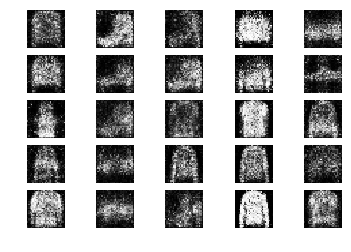

2001 [D loss: 0.615537, acc.: 62.50%] [G loss: 0.938011]
2002 [D loss: 0.667466, acc.: 59.38%] [G loss: 0.966481]
2003 [D loss: 0.550067, acc.: 79.69%] [G loss: 1.015259]
2004 [D loss: 0.643621, acc.: 59.38%] [G loss: 1.088760]
2005 [D loss: 0.627978, acc.: 67.19%] [G loss: 0.966150]
2006 [D loss: 0.589565, acc.: 68.75%] [G loss: 0.918131]
2007 [D loss: 0.622978, acc.: 70.31%] [G loss: 0.897176]
2008 [D loss: 0.617086, acc.: 62.50%] [G loss: 0.931623]
2009 [D loss: 0.620087, acc.: 67.19%] [G loss: 0.931302]
2010 [D loss: 0.656187, acc.: 67.19%] [G loss: 0.804174]
2011 [D loss: 0.609219, acc.: 64.06%] [G loss: 0.898554]
2012 [D loss: 0.628201, acc.: 56.25%] [G loss: 0.835228]
2013 [D loss: 0.628275, acc.: 59.38%] [G loss: 0.909597]
2014 [D loss: 0.562043, acc.: 75.00%] [G loss: 0.793440]
2015 [D loss: 0.628829, acc.: 65.62%] [G loss: 0.991413]
2016 [D loss: 0.611057, acc.: 64.06%] [G loss: 0.964467]
2017 [D loss: 0.592433, acc.: 68.75%] [G loss: 0.953090]
2018 [D loss: 0.630147, acc.: 6

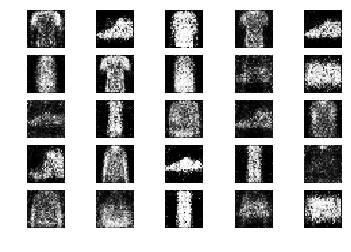

2051 [D loss: 0.613541, acc.: 71.88%] [G loss: 0.905607]
2052 [D loss: 0.661314, acc.: 53.12%] [G loss: 0.784900]
2053 [D loss: 0.544454, acc.: 78.12%] [G loss: 0.839401]
2054 [D loss: 0.550262, acc.: 73.44%] [G loss: 0.977846]
2055 [D loss: 0.689396, acc.: 70.31%] [G loss: 0.959507]
2056 [D loss: 0.629786, acc.: 60.94%] [G loss: 0.875554]
2057 [D loss: 0.535005, acc.: 75.00%] [G loss: 0.961913]
2058 [D loss: 0.641111, acc.: 56.25%] [G loss: 0.949668]
2059 [D loss: 0.558386, acc.: 78.12%] [G loss: 0.944361]
2060 [D loss: 0.648405, acc.: 59.38%] [G loss: 1.001647]
2061 [D loss: 0.625906, acc.: 59.38%] [G loss: 0.900851]
2062 [D loss: 0.631646, acc.: 59.38%] [G loss: 0.995727]
2063 [D loss: 0.632227, acc.: 62.50%] [G loss: 1.054343]
2064 [D loss: 0.574118, acc.: 73.44%] [G loss: 1.012526]
2065 [D loss: 0.718814, acc.: 46.88%] [G loss: 0.940550]
2066 [D loss: 0.604383, acc.: 70.31%] [G loss: 0.941726]
2067 [D loss: 0.613654, acc.: 60.94%] [G loss: 0.990952]
2068 [D loss: 0.609856, acc.: 6

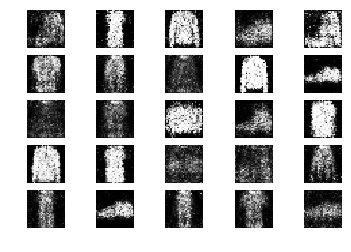

2101 [D loss: 0.583187, acc.: 70.31%] [G loss: 0.938335]
2102 [D loss: 0.609394, acc.: 67.19%] [G loss: 0.912786]
2103 [D loss: 0.607130, acc.: 68.75%] [G loss: 0.955910]
2104 [D loss: 0.523527, acc.: 81.25%] [G loss: 1.034206]
2105 [D loss: 0.609865, acc.: 68.75%] [G loss: 1.019086]
2106 [D loss: 0.524406, acc.: 76.56%] [G loss: 0.943065]
2107 [D loss: 0.637344, acc.: 62.50%] [G loss: 1.041095]
2108 [D loss: 0.605003, acc.: 65.62%] [G loss: 1.047615]
2109 [D loss: 0.616068, acc.: 67.19%] [G loss: 0.953455]
2110 [D loss: 0.579596, acc.: 73.44%] [G loss: 0.909410]
2111 [D loss: 0.619365, acc.: 75.00%] [G loss: 0.981039]
2112 [D loss: 0.655819, acc.: 62.50%] [G loss: 0.802389]
2113 [D loss: 0.541806, acc.: 76.56%] [G loss: 0.978724]
2114 [D loss: 0.609103, acc.: 67.19%] [G loss: 1.017906]
2115 [D loss: 0.595928, acc.: 68.75%] [G loss: 0.926867]
2116 [D loss: 0.539223, acc.: 76.56%] [G loss: 1.011140]
2117 [D loss: 0.702307, acc.: 59.38%] [G loss: 0.976345]
2118 [D loss: 0.660508, acc.: 6

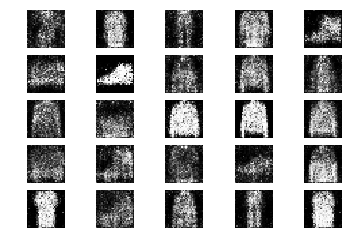

2151 [D loss: 0.627075, acc.: 67.19%] [G loss: 0.951633]
2152 [D loss: 0.667197, acc.: 57.81%] [G loss: 0.995956]
2153 [D loss: 0.671409, acc.: 62.50%] [G loss: 0.947683]
2154 [D loss: 0.568455, acc.: 70.31%] [G loss: 0.992037]
2155 [D loss: 0.592090, acc.: 75.00%] [G loss: 1.024081]
2156 [D loss: 0.607254, acc.: 65.62%] [G loss: 0.944568]
2157 [D loss: 0.663374, acc.: 59.38%] [G loss: 0.961123]
2158 [D loss: 0.625335, acc.: 67.19%] [G loss: 0.995590]
2159 [D loss: 0.556656, acc.: 73.44%] [G loss: 0.903525]
2160 [D loss: 0.762282, acc.: 40.62%] [G loss: 0.846630]
2161 [D loss: 0.695119, acc.: 56.25%] [G loss: 0.915350]
2162 [D loss: 0.539538, acc.: 75.00%] [G loss: 1.040451]
2163 [D loss: 0.610560, acc.: 60.94%] [G loss: 0.985866]
2164 [D loss: 0.654709, acc.: 59.38%] [G loss: 1.073697]
2165 [D loss: 0.632548, acc.: 71.88%] [G loss: 0.953013]
2166 [D loss: 0.603622, acc.: 59.38%] [G loss: 0.962817]
2167 [D loss: 0.628170, acc.: 62.50%] [G loss: 0.965985]
2168 [D loss: 0.600683, acc.: 7

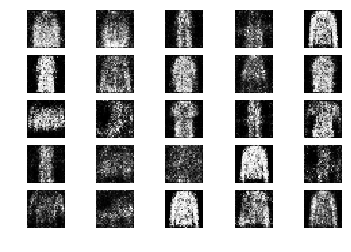

2201 [D loss: 0.600912, acc.: 62.50%] [G loss: 1.036885]
2202 [D loss: 0.634216, acc.: 62.50%] [G loss: 0.939314]
2203 [D loss: 0.658705, acc.: 59.38%] [G loss: 1.006881]
2204 [D loss: 0.596122, acc.: 62.50%] [G loss: 0.986038]
2205 [D loss: 0.678904, acc.: 64.06%] [G loss: 0.948262]
2206 [D loss: 0.641070, acc.: 62.50%] [G loss: 0.861523]
2207 [D loss: 0.647655, acc.: 64.06%] [G loss: 0.863955]
2208 [D loss: 0.681201, acc.: 60.94%] [G loss: 0.907993]
2209 [D loss: 0.613651, acc.: 65.62%] [G loss: 0.950269]
2210 [D loss: 0.606311, acc.: 70.31%] [G loss: 0.934746]
2211 [D loss: 0.522083, acc.: 85.94%] [G loss: 0.937938]
2212 [D loss: 0.613001, acc.: 65.62%] [G loss: 0.930443]
2213 [D loss: 0.607142, acc.: 73.44%] [G loss: 0.993740]
2214 [D loss: 0.610551, acc.: 65.62%] [G loss: 1.004708]
2215 [D loss: 0.589796, acc.: 68.75%] [G loss: 0.980273]
2216 [D loss: 0.622290, acc.: 65.62%] [G loss: 0.883046]
2217 [D loss: 0.580074, acc.: 75.00%] [G loss: 0.917084]
2218 [D loss: 0.563940, acc.: 7

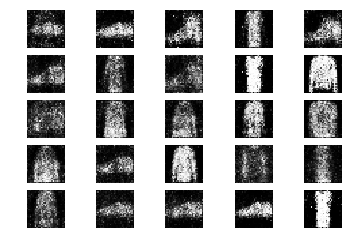

2251 [D loss: 0.608430, acc.: 68.75%] [G loss: 0.994534]
2252 [D loss: 0.642113, acc.: 68.75%] [G loss: 0.916360]
2253 [D loss: 0.640418, acc.: 67.19%] [G loss: 0.945783]
2254 [D loss: 0.668007, acc.: 64.06%] [G loss: 1.005654]
2255 [D loss: 0.653704, acc.: 59.38%] [G loss: 0.953132]
2256 [D loss: 0.597509, acc.: 68.75%] [G loss: 0.892096]
2257 [D loss: 0.547524, acc.: 71.88%] [G loss: 0.942084]
2258 [D loss: 0.543061, acc.: 75.00%] [G loss: 0.967870]
2259 [D loss: 0.601860, acc.: 67.19%] [G loss: 0.886733]
2260 [D loss: 0.657058, acc.: 60.94%] [G loss: 0.849375]
2261 [D loss: 0.619135, acc.: 65.62%] [G loss: 0.887130]
2262 [D loss: 0.676015, acc.: 59.38%] [G loss: 1.030008]
2263 [D loss: 0.533913, acc.: 71.88%] [G loss: 0.982948]
2264 [D loss: 0.661633, acc.: 60.94%] [G loss: 0.913499]
2265 [D loss: 0.608499, acc.: 75.00%] [G loss: 0.987977]
2266 [D loss: 0.634898, acc.: 64.06%] [G loss: 0.994697]
2267 [D loss: 0.596614, acc.: 71.88%] [G loss: 1.098919]
2268 [D loss: 0.631484, acc.: 5

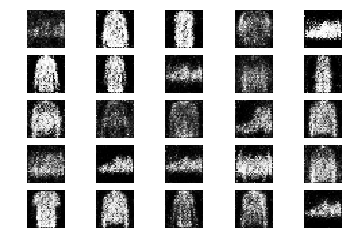

2301 [D loss: 0.589568, acc.: 62.50%] [G loss: 0.878204]
2302 [D loss: 0.622157, acc.: 62.50%] [G loss: 0.875467]
2303 [D loss: 0.515808, acc.: 84.38%] [G loss: 0.924381]
2304 [D loss: 0.679444, acc.: 53.12%] [G loss: 1.031277]
2305 [D loss: 0.647333, acc.: 65.62%] [G loss: 0.845699]
2306 [D loss: 0.630988, acc.: 64.06%] [G loss: 0.942654]
2307 [D loss: 0.621424, acc.: 71.88%] [G loss: 0.890244]
2308 [D loss: 0.580130, acc.: 70.31%] [G loss: 0.993449]
2309 [D loss: 0.715119, acc.: 50.00%] [G loss: 0.991967]
2310 [D loss: 0.597809, acc.: 75.00%] [G loss: 0.931178]
2311 [D loss: 0.601786, acc.: 70.31%] [G loss: 0.889706]
2312 [D loss: 0.633749, acc.: 59.38%] [G loss: 0.954566]
2313 [D loss: 0.713696, acc.: 53.12%] [G loss: 0.940244]
2314 [D loss: 0.662374, acc.: 64.06%] [G loss: 0.950061]
2315 [D loss: 0.691969, acc.: 57.81%] [G loss: 0.999126]
2316 [D loss: 0.607959, acc.: 70.31%] [G loss: 0.998930]
2317 [D loss: 0.565814, acc.: 71.88%] [G loss: 1.087905]
2318 [D loss: 0.608190, acc.: 7

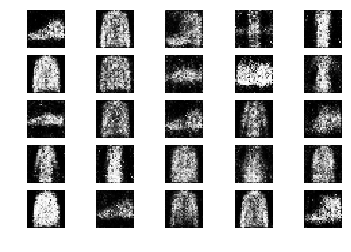

2351 [D loss: 0.652900, acc.: 64.06%] [G loss: 0.958156]
2352 [D loss: 0.538091, acc.: 76.56%] [G loss: 0.982736]
2353 [D loss: 0.659349, acc.: 62.50%] [G loss: 0.926484]
2354 [D loss: 0.615226, acc.: 65.62%] [G loss: 1.042507]
2355 [D loss: 0.527263, acc.: 70.31%] [G loss: 0.991831]
2356 [D loss: 0.598131, acc.: 68.75%] [G loss: 1.004973]
2357 [D loss: 0.622944, acc.: 64.06%] [G loss: 0.966074]
2358 [D loss: 0.676042, acc.: 57.81%] [G loss: 0.886422]
2359 [D loss: 0.604984, acc.: 67.19%] [G loss: 0.970319]
2360 [D loss: 0.579957, acc.: 60.94%] [G loss: 0.966303]
2361 [D loss: 0.618051, acc.: 57.81%] [G loss: 0.959581]
2362 [D loss: 0.562505, acc.: 70.31%] [G loss: 0.964575]
2363 [D loss: 0.585732, acc.: 67.19%] [G loss: 1.010655]
2364 [D loss: 0.576260, acc.: 75.00%] [G loss: 0.997646]
2365 [D loss: 0.683983, acc.: 51.56%] [G loss: 0.961972]
2366 [D loss: 0.517865, acc.: 76.56%] [G loss: 1.093507]
2367 [D loss: 0.691287, acc.: 57.81%] [G loss: 0.911702]
2368 [D loss: 0.586749, acc.: 7

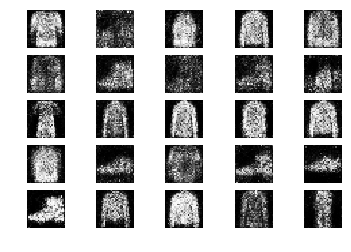

2401 [D loss: 0.612303, acc.: 65.62%] [G loss: 0.914805]
2402 [D loss: 0.617474, acc.: 65.62%] [G loss: 1.014170]
2403 [D loss: 0.646842, acc.: 64.06%] [G loss: 0.954653]
2404 [D loss: 0.638787, acc.: 62.50%] [G loss: 1.036392]
2405 [D loss: 0.634549, acc.: 60.94%] [G loss: 1.000067]
2406 [D loss: 0.652024, acc.: 60.94%] [G loss: 0.851812]
2407 [D loss: 0.570440, acc.: 67.19%] [G loss: 0.887138]
2408 [D loss: 0.664397, acc.: 62.50%] [G loss: 0.948910]
2409 [D loss: 0.646566, acc.: 59.38%] [G loss: 0.957554]
2410 [D loss: 0.691718, acc.: 60.94%] [G loss: 1.039389]
2411 [D loss: 0.567967, acc.: 67.19%] [G loss: 1.013071]
2412 [D loss: 0.664216, acc.: 64.06%] [G loss: 0.936514]
2413 [D loss: 0.640180, acc.: 62.50%] [G loss: 0.940733]
2414 [D loss: 0.685945, acc.: 65.62%] [G loss: 0.876164]
2415 [D loss: 0.695500, acc.: 53.12%] [G loss: 0.914415]
2416 [D loss: 0.606313, acc.: 65.62%] [G loss: 0.985181]
2417 [D loss: 0.678880, acc.: 56.25%] [G loss: 0.937620]
2418 [D loss: 0.650076, acc.: 6

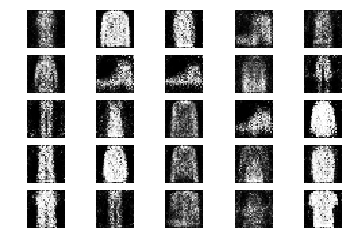

2451 [D loss: 0.645155, acc.: 65.62%] [G loss: 0.869014]
2452 [D loss: 0.612556, acc.: 68.75%] [G loss: 1.065616]
2453 [D loss: 0.603348, acc.: 70.31%] [G loss: 1.047200]
2454 [D loss: 0.647225, acc.: 64.06%] [G loss: 0.938578]
2455 [D loss: 0.622343, acc.: 60.94%] [G loss: 0.960167]
2456 [D loss: 0.670923, acc.: 59.38%] [G loss: 0.872365]
2457 [D loss: 0.582713, acc.: 68.75%] [G loss: 0.879403]
2458 [D loss: 0.682641, acc.: 62.50%] [G loss: 0.832156]
2459 [D loss: 0.558251, acc.: 73.44%] [G loss: 0.861751]
2460 [D loss: 0.627580, acc.: 64.06%] [G loss: 0.853924]
2461 [D loss: 0.628670, acc.: 70.31%] [G loss: 0.881864]
2462 [D loss: 0.599099, acc.: 65.62%] [G loss: 0.971734]
2463 [D loss: 0.543709, acc.: 70.31%] [G loss: 0.976249]
2464 [D loss: 0.668749, acc.: 59.38%] [G loss: 0.888882]
2465 [D loss: 0.638770, acc.: 64.06%] [G loss: 0.890389]
2466 [D loss: 0.657586, acc.: 51.56%] [G loss: 0.888270]
2467 [D loss: 0.622915, acc.: 57.81%] [G loss: 0.889893]
2468 [D loss: 0.628723, acc.: 6

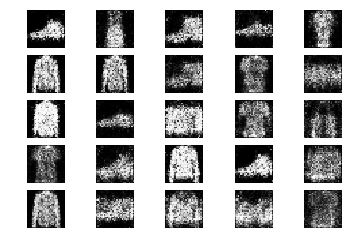

2501 [D loss: 0.635452, acc.: 62.50%] [G loss: 0.963130]
2502 [D loss: 0.589281, acc.: 68.75%] [G loss: 0.908842]
2503 [D loss: 0.590624, acc.: 70.31%] [G loss: 1.053763]
2504 [D loss: 0.655539, acc.: 60.94%] [G loss: 0.903806]
2505 [D loss: 0.738481, acc.: 54.69%] [G loss: 1.023721]
2506 [D loss: 0.676378, acc.: 51.56%] [G loss: 1.018250]
2507 [D loss: 0.621369, acc.: 64.06%] [G loss: 0.902167]
2508 [D loss: 0.612837, acc.: 67.19%] [G loss: 0.956689]
2509 [D loss: 0.687983, acc.: 56.25%] [G loss: 0.827195]
2510 [D loss: 0.716856, acc.: 53.12%] [G loss: 0.952543]
2511 [D loss: 0.644586, acc.: 64.06%] [G loss: 0.887287]
2512 [D loss: 0.549853, acc.: 75.00%] [G loss: 0.946048]
2513 [D loss: 0.601575, acc.: 65.62%] [G loss: 0.914812]
2514 [D loss: 0.705095, acc.: 57.81%] [G loss: 0.917617]
2515 [D loss: 0.621959, acc.: 68.75%] [G loss: 0.893292]
2516 [D loss: 0.597706, acc.: 65.62%] [G loss: 0.894543]
2517 [D loss: 0.608313, acc.: 57.81%] [G loss: 0.950713]
2518 [D loss: 0.664622, acc.: 6

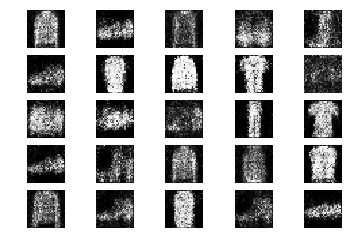

2551 [D loss: 0.620851, acc.: 59.38%] [G loss: 0.951785]
2552 [D loss: 0.595514, acc.: 67.19%] [G loss: 0.975434]
2553 [D loss: 0.619302, acc.: 64.06%] [G loss: 0.926935]
2554 [D loss: 0.583164, acc.: 70.31%] [G loss: 0.973413]
2555 [D loss: 0.645468, acc.: 60.94%] [G loss: 0.946516]
2556 [D loss: 0.718382, acc.: 56.25%] [G loss: 0.890592]
2557 [D loss: 0.744328, acc.: 48.44%] [G loss: 0.871882]
2558 [D loss: 0.659816, acc.: 68.75%] [G loss: 0.893189]
2559 [D loss: 0.643671, acc.: 60.94%] [G loss: 0.947178]
2560 [D loss: 0.610763, acc.: 64.06%] [G loss: 0.896239]
2561 [D loss: 0.656160, acc.: 54.69%] [G loss: 0.857598]
2562 [D loss: 0.637124, acc.: 59.38%] [G loss: 0.831160]
2563 [D loss: 0.592115, acc.: 73.44%] [G loss: 0.890783]
2564 [D loss: 0.664902, acc.: 54.69%] [G loss: 0.908023]
2565 [D loss: 0.547905, acc.: 73.44%] [G loss: 0.884437]
2566 [D loss: 0.613588, acc.: 64.06%] [G loss: 0.925992]
2567 [D loss: 0.621949, acc.: 68.75%] [G loss: 0.971723]
2568 [D loss: 0.642970, acc.: 5

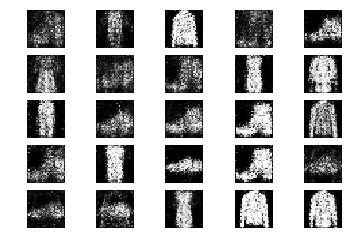

2601 [D loss: 0.636572, acc.: 59.38%] [G loss: 0.932951]
2602 [D loss: 0.588208, acc.: 68.75%] [G loss: 0.993407]
2603 [D loss: 0.665902, acc.: 65.62%] [G loss: 0.960062]
2604 [D loss: 0.613181, acc.: 68.75%] [G loss: 0.960244]
2605 [D loss: 0.703817, acc.: 48.44%] [G loss: 1.041034]
2606 [D loss: 0.671581, acc.: 60.94%] [G loss: 0.983416]
2607 [D loss: 0.681712, acc.: 57.81%] [G loss: 1.040086]
2608 [D loss: 0.683933, acc.: 59.38%] [G loss: 0.954803]
2609 [D loss: 0.606787, acc.: 67.19%] [G loss: 0.996608]
2610 [D loss: 0.635891, acc.: 59.38%] [G loss: 0.900565]
2611 [D loss: 0.635004, acc.: 64.06%] [G loss: 0.980283]
2612 [D loss: 0.613667, acc.: 68.75%] [G loss: 0.894321]
2613 [D loss: 0.595035, acc.: 70.31%] [G loss: 1.025668]
2614 [D loss: 0.606374, acc.: 70.31%] [G loss: 0.924437]
2615 [D loss: 0.645262, acc.: 67.19%] [G loss: 0.960506]
2616 [D loss: 0.627492, acc.: 65.62%] [G loss: 0.910768]
2617 [D loss: 0.657496, acc.: 53.12%] [G loss: 0.936060]
2618 [D loss: 0.636145, acc.: 5

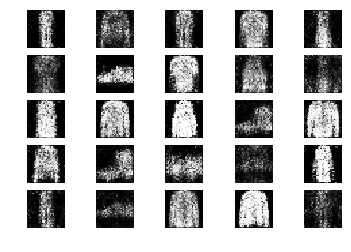

2651 [D loss: 0.558550, acc.: 76.56%] [G loss: 0.863715]
2652 [D loss: 0.593681, acc.: 67.19%] [G loss: 0.953847]
2653 [D loss: 0.646987, acc.: 62.50%] [G loss: 0.970284]
2654 [D loss: 0.602007, acc.: 67.19%] [G loss: 0.967661]
2655 [D loss: 0.594283, acc.: 75.00%] [G loss: 0.952459]
2656 [D loss: 0.654955, acc.: 59.38%] [G loss: 0.937870]
2657 [D loss: 0.704091, acc.: 50.00%] [G loss: 0.900493]
2658 [D loss: 0.636626, acc.: 56.25%] [G loss: 0.906697]
2659 [D loss: 0.608920, acc.: 68.75%] [G loss: 0.923466]
2660 [D loss: 0.574227, acc.: 68.75%] [G loss: 0.976058]
2661 [D loss: 0.573889, acc.: 70.31%] [G loss: 1.032894]
2662 [D loss: 0.660282, acc.: 57.81%] [G loss: 1.021308]
2663 [D loss: 0.641422, acc.: 56.25%] [G loss: 0.970162]
2664 [D loss: 0.577748, acc.: 76.56%] [G loss: 0.997356]
2665 [D loss: 0.648540, acc.: 60.94%] [G loss: 0.952202]
2666 [D loss: 0.661809, acc.: 57.81%] [G loss: 0.876288]
2667 [D loss: 0.675803, acc.: 50.00%] [G loss: 0.956406]
2668 [D loss: 0.635727, acc.: 5

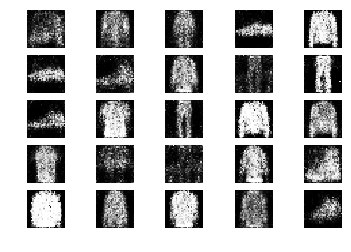

2701 [D loss: 0.643888, acc.: 60.94%] [G loss: 0.961916]
2702 [D loss: 0.624895, acc.: 59.38%] [G loss: 0.936917]
2703 [D loss: 0.636593, acc.: 53.12%] [G loss: 0.964512]
2704 [D loss: 0.602017, acc.: 70.31%] [G loss: 0.864640]
2705 [D loss: 0.633571, acc.: 62.50%] [G loss: 0.960863]
2706 [D loss: 0.630291, acc.: 65.62%] [G loss: 0.986698]
2707 [D loss: 0.604116, acc.: 70.31%] [G loss: 0.971058]
2708 [D loss: 0.600143, acc.: 65.62%] [G loss: 0.938289]
2709 [D loss: 0.679456, acc.: 62.50%] [G loss: 0.914109]
2710 [D loss: 0.631395, acc.: 62.50%] [G loss: 1.012065]
2711 [D loss: 0.603732, acc.: 71.88%] [G loss: 0.916066]
2712 [D loss: 0.577971, acc.: 68.75%] [G loss: 0.924786]
2713 [D loss: 0.638822, acc.: 62.50%] [G loss: 0.865303]
2714 [D loss: 0.653481, acc.: 60.94%] [G loss: 0.902569]
2715 [D loss: 0.650425, acc.: 64.06%] [G loss: 0.874683]
2716 [D loss: 0.609309, acc.: 59.38%] [G loss: 0.911399]
2717 [D loss: 0.674157, acc.: 64.06%] [G loss: 0.944392]
2718 [D loss: 0.662378, acc.: 5

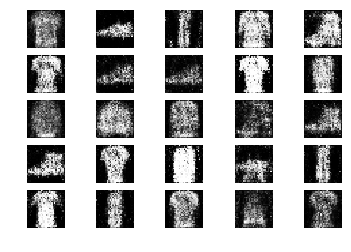

2751 [D loss: 0.563217, acc.: 73.44%] [G loss: 0.983458]
2752 [D loss: 0.598153, acc.: 70.31%] [G loss: 0.971150]
2753 [D loss: 0.647822, acc.: 67.19%] [G loss: 1.017164]
2754 [D loss: 0.633832, acc.: 64.06%] [G loss: 0.873171]
2755 [D loss: 0.612144, acc.: 64.06%] [G loss: 0.934016]
2756 [D loss: 0.579474, acc.: 71.88%] [G loss: 1.021873]
2757 [D loss: 0.570830, acc.: 64.06%] [G loss: 0.911443]
2758 [D loss: 0.668549, acc.: 62.50%] [G loss: 1.018598]
2759 [D loss: 0.631393, acc.: 62.50%] [G loss: 0.919415]
2760 [D loss: 0.669572, acc.: 56.25%] [G loss: 0.922818]
2761 [D loss: 0.564923, acc.: 71.88%] [G loss: 0.969089]
2762 [D loss: 0.587902, acc.: 73.44%] [G loss: 0.996746]
2763 [D loss: 0.612211, acc.: 68.75%] [G loss: 0.966460]
2764 [D loss: 0.668192, acc.: 57.81%] [G loss: 0.931913]
2765 [D loss: 0.618299, acc.: 67.19%] [G loss: 0.914040]
2766 [D loss: 0.619539, acc.: 67.19%] [G loss: 0.881082]
2767 [D loss: 0.583130, acc.: 67.19%] [G loss: 0.788524]
2768 [D loss: 0.669091, acc.: 4

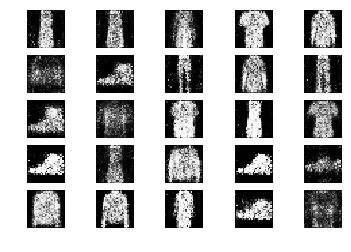

2801 [D loss: 0.625948, acc.: 68.75%] [G loss: 0.946686]
2802 [D loss: 0.612511, acc.: 65.62%] [G loss: 0.903186]
2803 [D loss: 0.631947, acc.: 59.38%] [G loss: 0.943612]
2804 [D loss: 0.632570, acc.: 59.38%] [G loss: 0.843653]
2805 [D loss: 0.574237, acc.: 70.31%] [G loss: 0.921123]
2806 [D loss: 0.609966, acc.: 70.31%] [G loss: 1.026477]
2807 [D loss: 0.646785, acc.: 59.38%] [G loss: 0.803312]
2808 [D loss: 0.575049, acc.: 75.00%] [G loss: 0.932590]
2809 [D loss: 0.585770, acc.: 67.19%] [G loss: 0.937455]
2810 [D loss: 0.639142, acc.: 59.38%] [G loss: 0.948765]
2811 [D loss: 0.591974, acc.: 71.88%] [G loss: 0.875417]
2812 [D loss: 0.645125, acc.: 62.50%] [G loss: 0.958515]
2813 [D loss: 0.640908, acc.: 62.50%] [G loss: 1.145882]
2814 [D loss: 0.602060, acc.: 71.88%] [G loss: 1.046788]
2815 [D loss: 0.539811, acc.: 71.88%] [G loss: 1.015093]
2816 [D loss: 0.696356, acc.: 50.00%] [G loss: 0.858184]
2817 [D loss: 0.576255, acc.: 70.31%] [G loss: 0.925485]
2818 [D loss: 0.671119, acc.: 5

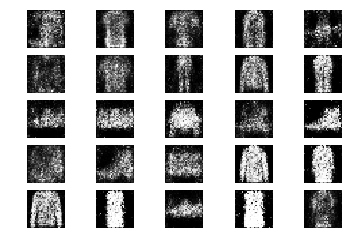

2851 [D loss: 0.644016, acc.: 64.06%] [G loss: 0.975781]
2852 [D loss: 0.680273, acc.: 53.12%] [G loss: 0.919681]
2853 [D loss: 0.645937, acc.: 64.06%] [G loss: 0.909018]
2854 [D loss: 0.628294, acc.: 62.50%] [G loss: 0.930321]
2855 [D loss: 0.612328, acc.: 64.06%] [G loss: 0.939732]
2856 [D loss: 0.595971, acc.: 73.44%] [G loss: 0.900215]
2857 [D loss: 0.638408, acc.: 59.38%] [G loss: 1.025969]
2858 [D loss: 0.618949, acc.: 64.06%] [G loss: 0.988501]
2859 [D loss: 0.704177, acc.: 57.81%] [G loss: 0.950845]
2860 [D loss: 0.625480, acc.: 65.62%] [G loss: 0.955664]
2861 [D loss: 0.693359, acc.: 54.69%] [G loss: 0.945232]
2862 [D loss: 0.616259, acc.: 67.19%] [G loss: 0.970208]
2863 [D loss: 0.690336, acc.: 60.94%] [G loss: 0.966168]
2864 [D loss: 0.662942, acc.: 65.62%] [G loss: 0.976501]
2865 [D loss: 0.628023, acc.: 60.94%] [G loss: 0.976090]
2866 [D loss: 0.674026, acc.: 62.50%] [G loss: 1.016614]
2867 [D loss: 0.637248, acc.: 62.50%] [G loss: 0.950269]
2868 [D loss: 0.675433, acc.: 6

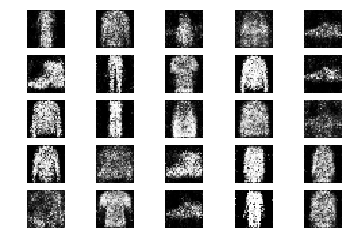

2901 [D loss: 0.686147, acc.: 56.25%] [G loss: 0.942835]
2902 [D loss: 0.560574, acc.: 73.44%] [G loss: 0.990067]
2903 [D loss: 0.642391, acc.: 64.06%] [G loss: 1.018106]
2904 [D loss: 0.665078, acc.: 57.81%] [G loss: 0.929205]
2905 [D loss: 0.627149, acc.: 65.62%] [G loss: 0.921594]
2906 [D loss: 0.601828, acc.: 75.00%] [G loss: 0.938540]
2907 [D loss: 0.620951, acc.: 67.19%] [G loss: 0.874526]
2908 [D loss: 0.672856, acc.: 59.38%] [G loss: 0.952637]
2909 [D loss: 0.638472, acc.: 60.94%] [G loss: 0.815970]
2910 [D loss: 0.656117, acc.: 62.50%] [G loss: 0.853565]
2911 [D loss: 0.640100, acc.: 59.38%] [G loss: 0.899760]
2912 [D loss: 0.640627, acc.: 62.50%] [G loss: 1.010675]
2913 [D loss: 0.620391, acc.: 70.31%] [G loss: 1.012757]
2914 [D loss: 0.592929, acc.: 64.06%] [G loss: 0.993548]
2915 [D loss: 0.621558, acc.: 65.62%] [G loss: 0.996374]
2916 [D loss: 0.611238, acc.: 62.50%] [G loss: 0.870448]
2917 [D loss: 0.574473, acc.: 71.88%] [G loss: 0.892917]
2918 [D loss: 0.700565, acc.: 5

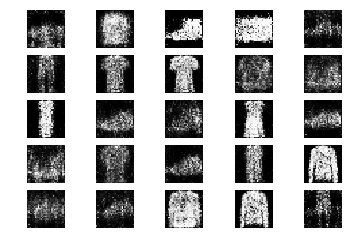

2951 [D loss: 0.628423, acc.: 64.06%] [G loss: 0.872511]
2952 [D loss: 0.559645, acc.: 67.19%] [G loss: 0.868580]
2953 [D loss: 0.629924, acc.: 65.62%] [G loss: 0.976846]
2954 [D loss: 0.694706, acc.: 54.69%] [G loss: 0.866963]
2955 [D loss: 0.672824, acc.: 62.50%] [G loss: 0.886679]
2956 [D loss: 0.632034, acc.: 68.75%] [G loss: 0.895107]
2957 [D loss: 0.636730, acc.: 62.50%] [G loss: 0.850191]
2958 [D loss: 0.566350, acc.: 76.56%] [G loss: 1.001533]
2959 [D loss: 0.585699, acc.: 65.62%] [G loss: 1.000120]
2960 [D loss: 0.631242, acc.: 60.94%] [G loss: 0.894866]
2961 [D loss: 0.584103, acc.: 71.88%] [G loss: 0.915440]
2962 [D loss: 0.669955, acc.: 51.56%] [G loss: 0.985948]
2963 [D loss: 0.637128, acc.: 64.06%] [G loss: 0.973168]
2964 [D loss: 0.628979, acc.: 64.06%] [G loss: 0.993125]
2965 [D loss: 0.623611, acc.: 67.19%] [G loss: 1.024403]
2966 [D loss: 0.675083, acc.: 50.00%] [G loss: 1.025342]
2967 [D loss: 0.576795, acc.: 68.75%] [G loss: 0.804607]
2968 [D loss: 0.606396, acc.: 7

In [11]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

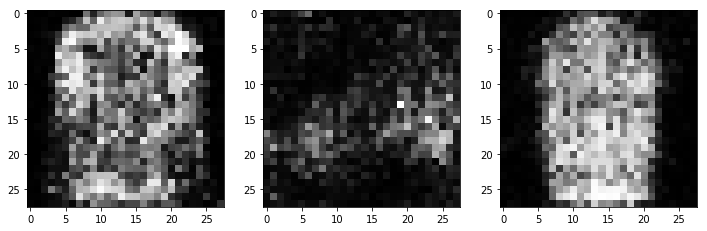

In [12]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()